<a href="https://colab.research.google.com/github/VivekGeda1/Netflix-Case-study/blob/main/Netflix_Casestudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color='purple'>****1. Problem Statement:****</font>

The Primary goal of the analysis is to understand the content landscape of Netflix through data analysis and giving suitable recommendations

In [ ]:
df_netflix = pd.read_csv("netflix.csv",skipinitialspace=True)
df_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### <font color='blue'>**Data Preprocessing/Data Cleaning**</font>

In [ ]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Release year colulmn is interger type while all other columns are Object type i.e string types

In [ ]:
df_netflix.shape

(8807, 12)

There are 8807 records(rows) and 12 series(columns) in the dataframe(table)

In [ ]:
df_netflix.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
df_netflix.describe(include = 'object').T

,count,unique,top,freq
show_id,8807,8807,s8807,1
type,8807,2,Movie,6131
title,8807,8807,Zubaan,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


In [ ]:
df_netflix.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
df_netflix["director"].head(20)

,director
0,Kirsten Johnson
1,NaN
2,Julien Leclercq
3,NaN
4,NaN
5,Mike Flanagan
6,"Robert Cullen, José Luis Ucha"
7,Haile Gerima
8,Andy Devonshire
9,Theodore Melfi


In [ ]:
#Treating Director Column

In [ ]:
df_netflix["director"].dtype

dtype('O')

In [ ]:
df_netflix["director"].apply(lambda x: str(x).split(",")).head(20) #Splitting value s in a single cell

,director
0,[Kirsten Johnson]
1,[nan]
2,[Julien Leclercq]
3,[nan]
4,[nan]
5,[Mike Flanagan]
6,"[Robert Cullen, José Luis Ucha]"
7,[Haile Gerima]
8,[Andy Devonshire]
9,[Theodore Melfi]


In [ ]:
df_netflix["director"].apply(lambda x: str(x).split(",")).tolist() #Converting values in a cell from string to list format. List of Lists


[['Kirsten Johnson'],
 ['nan'],
 ['Julien Leclercq'],
 ['nan'],
 ['nan'],
 ['Mike Flanagan'],
 ['Robert Cullen', ' José Luis Ucha'],
 ['Haile Gerima'],
 ['Andy Devonshire'],
 ['Theodore Melfi'],
 ['nan'],
 ['Kongkiat Komesiri'],
 ['Christian Schwochow'],
 ['Bruno Garotti'],
 ['nan'],
 ['nan'],
 ['Pedro de Echave García', ' Pablo Azorín Williams'],
 ['nan'],
 ['Adam Salky'],
 ['nan'],
 ['Olivier Megaton'],
 ['nan'],
 ['K.S. Ravikumar'],
 ['Alex Woo', ' Stanley Moore'],
 ['S. Shankar'],
 ['nan'],
 ['Rajiv Menon'],
 ['Dennis Dugan'],
 ['Scott Stewart'],
 ['Robert Luketic'],
 ['Ashwiny Iyer Tiwari', ' Abhishek Chaubey', ' Saket Chaudhary'],
 ['nan'],
 ['nan'],
 ['nan'],
 ['nan'],
 ['Daniel Sandu'],
 ['Cédric Jimenez'],
 ['nan'],
 ['George Nolfi'],
 ['nan'],
 ['nan'],
 ['Steven Spielberg'],
 ['Jeannot Szwarc'],
 ['Joe Alves'],
 ['Joseph Sargent'],
 ['Tyler Greco'],
 ['Daniel Espinosa'],
 ['Bunmi Ajakaiye'],
 ['Antoine Fuqua'],
 ['nan'],
 ['nan'],
 ['Toshiya Shinohara'],
 ['Toshiya Shinohara

In [ ]:
df_director_t = pd.DataFrame((df_netflix["director"].apply(lambda x: str(x).split(",")).tolist()),index = df_netflix["title"]) #Converting into DataFrame
df_director_t.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12
title,,,,,,,,,,,,,
Dick Johnson Is Dead,Kirsten Johnson,None,None,None,None,None,None,None,None,None,None,None,None
Blood & Water,nan,None,None,None,None,None,None,None,None,None,None,None,None
Ganglands,Julien Leclercq,None,None,None,None,None,None,None,None,None,None,None,None
Jailbirds New Orleans,nan,None,None,None,None,None,None,None,None,None,None,None,None
Kota Factory,nan,None,None,None,None,None,None,None,None,None,None,None,None
Midnight Mass,Mike Flanagan,None,None,None,None,None,None,None,None,None,None,None,None
My Little Pony: A New Generation,Robert Cullen,José Luis Ucha,None,None,None,None,None,None,None,None,None,None,None
Sankofa,Haile Gerima,None,None,None,None,None,None,None,None,None,None,None,None
The Great British Baking Show,Andy Devonshire,None,None,None,None,None,None,None,None,None,None,None,None


In [ ]:
df_director = df_director_t.stack().reset_index() #Converting columns into rows and then resetting to a dataframe
df_director.tail(10)

,title,level_1,0
9602,Zak Storm,0,nan
9603,Zed Plus,0,Chandra Prakash Dwivedi
9604,Zenda,0,Avadhoot Gupte
9605,Zindagi Gulzar Hai,0,nan
9606,Zinzana,0,Majid Al Ansari
9607,Zodiac,0,David Fincher
9608,Zombie Dumb,0,nan
9609,Zombieland,0,Ruben Fleischer
9610,Zoom,0,Peter Hewitt
9611,Zubaan,0,Mozez Singh


In [ ]:
df_director.drop("level_1",axis = 1,inplace = True) #Dropping column level 1
df_director.head()

,title,0
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan


In [ ]:
df_director.rename(columns = {0:"director"},inplace = True) #Adding the column title
df_director.head(10)

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan
5,Midnight Mass,Mike Flanagan
6,My Little Pony: A New Generation,Robert Cullen
7,My Little Pony: A New Generation,José Luis Ucha
8,Sankofa,Haile Gerima
9,The Great British Baking Show,Andy Devonshire


In [ ]:
#Unnesting Cast Column

In [ ]:
df_cast_t = pd.DataFrame((df_netflix["cast"].apply(lambda x: str(x).split(",")).tolist()),index = df_netflix["title"]) #Now unnesting cast column
df_cast = df_cast_t.stack().reset_index()
df_cast.drop("level_1",axis = 1,inplace = True)
df_cast.rename(columns = {0:"cast"},inplace = True)
df_cast.tail(10)

,title,cast
64941,Zoom,Rip Torn
64942,Zoom,Kevin Zegers
64943,Zubaan,Vicky Kaushal
64944,Zubaan,Sarah-Jane Dias
64945,Zubaan,Raaghav Chanana
64946,Zubaan,Manish Chaudhary
64947,Zubaan,Meghna Malik
64948,Zubaan,Malkeet Rauni
64949,Zubaan,Anita Shabdish
64950,Zubaan,Chittaranjan Tripathy


In [ ]:
#Unnesting Country Column

In [ ]:
df_netflix["country"].head(10)

,country
0,United States
1,South Africa
2,NaN
3,NaN
4,India
5,NaN
6,NaN
7,"United States, Ghana, Burkina Faso, United Kin..."
8,United Kingdom
9,United States


In [ ]:
df_country_t = pd.DataFrame((df_netflix["country"].apply(lambda x: str(x).split(",")).tolist()),index = df_netflix["title"]) #Unnesting country column
df_country = df_country_t.stack().reset_index()
df_country.drop("level_1",axis = 1,inplace = True)
df_country.rename(columns = {0:"country"},inplace = True)
df_country.tail(10)

,title,country
10840,Zed Plus,India
10841,Zenda,India
10842,Zindagi Gulzar Hai,Pakistan
10843,Zinzana,United Arab Emirates
10844,Zinzana,Jordan
10845,Zodiac,United States
10846,Zombie Dumb,nan
10847,Zombieland,United States
10848,Zoom,United States
10849,Zubaan,India


In [ ]:
#Unnesting of genre column

In [ ]:
df_listed_in_t = pd.DataFrame((df_netflix["listed_in"].apply(lambda x: str(x).split(",")).tolist()),index = df_netflix["title"]) # Unnesting Genre Column
df_listed_in = df_listed_in_t.stack().reset_index()
df_listed_in.drop("level_1",axis = 1,inplace = True)
df_listed_in.rename(columns = {0:"listed_in"},inplace = True)
df_listed_in.tail(10)

,title,listed_in
19313,Zombie Dumb,Kids' TV
19314,Zombie Dumb,Korean TV Shows
19315,Zombie Dumb,TV Comedies
19316,Zombieland,Comedies
19317,Zombieland,Horror Movies
19318,Zoom,Children & Family Movies
19319,Zoom,Comedies
19320,Zubaan,Dramas
19321,Zubaan,International Movies
19322,Zubaan,Music & Musicals


In [ ]:
df_netflix_new = df_director.merge(df_cast,on = ["title"],how = "inner", )          #Merging the treated columns
df_netflix_new = df_netflix_new.merge(df_country,on = ["title"],how = "inner")
df_netflix_new = df_netflix_new.merge(df_listed_in,on = ["title"],how = "inner")
df_netflix_new.tail()

,title,director,cast,country,listed_in
202060,Zubaan,Mozez Singh,Anita Shabdish,India,International Movies
202061,Zubaan,Mozez Singh,Anita Shabdish,India,Music & Musicals
202062,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,Dramas
202063,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,International Movies
202064,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,Music & Musicals


In [ ]:
df_netflix_new.shape

(202065, 5)

In [ ]:
df_netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
df_final = df_netflix_new.merge(df_netflix[['show_id','type','title','date_added',              #Merging with orginal df
       'release_year', 'rating', 'duration','description']],on = "title",how = "left")
df_final.head()


,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,description
0,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm..."
1,Blood & Water,nan,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,nan,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,nan,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
4,Blood & Water,nan,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."


In [ ]:
df_final.shape

(202065, 12)

Treating Nan- Missing values

In [ ]:
df_final["cast"].replace(["nan"],["Unknown actor"], inplace = True)


<ipython-input-30-d2da8590de36>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final["cast"].replace(["nan"],["Unknown actor"], inplace = True)


In [ ]:
df_final["director"].replace(["nan"],["Unknown director"], inplace = True)

<ipython-input-31-5b1eb9113f47>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final["director"].replace(["nan"],["Unknown director"], inplace = True)


In [ ]:
df_final.head()

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,description
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown actor,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm..."
1,Blood & Water,Unknown director,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,Unknown director,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,Unknown director,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
4,Blood & Water,Unknown director,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."


In [ ]:
df_final['country'].value_counts()

,count
country,
United States,49868
India,22139
nan,11897
United Kingdom,9733
United States,9482
...,...
Botswana,2
Afghanistan,2
Nicaragua,1


In [ ]:
nan_countries = df_final[df_final['country'] == 'nan']      #nan is a string value here
nan_countries.head()

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,description
58,Ganglands,Julien Leclercq,Sami Bouajila,nan,Crime TV Shows,s3,TV Show,"September 24, 2021",2021,TV-MA,1 Season,To protect his family from a powerful drug lor...
59,Ganglands,Julien Leclercq,Sami Bouajila,nan,International TV Shows,s3,TV Show,"September 24, 2021",2021,TV-MA,1 Season,To protect his family from a powerful drug lor...
60,Ganglands,Julien Leclercq,Sami Bouajila,nan,TV Action & Adventure,s3,TV Show,"September 24, 2021",2021,TV-MA,1 Season,To protect his family from a powerful drug lor...
61,Ganglands,Julien Leclercq,Tracy Gotoas,nan,Crime TV Shows,s3,TV Show,"September 24, 2021",2021,TV-MA,1 Season,To protect his family from a powerful drug lor...
62,Ganglands,Julien Leclercq,Tracy Gotoas,nan,International TV Shows,s3,TV Show,"September 24, 2021",2021,TV-MA,1 Season,To protect his family from a powerful drug lor...


In [ ]:
nan_np_countries = df_final[df_final['country'].isna()] #Reconfirmation
nan_np_countries.head()

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,description


In [ ]:
df_final["country"].replace(["nan"],[np.nan], inplace = True)

<ipython-input-36-80451d547629>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final["country"].replace(["nan"],[np.nan], inplace = True)


In [ ]:
df_final.isnull().sum()

,0
title,0
director,0
cast,0
country,11897
listed_in,0
show_id,0
type,0
date_added,158
release_year,0
rating,67


In [ ]:
df_final[df_final['duration'].isnull()]

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,description
126582,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,Movies,s5542,Movie,"April 4, 2017",2017,74 min,NaN,"Louis C.K. muses on religion, eternal love, gi..."
131648,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,Movies,s5795,Movie,"September 16, 2016",2010,84 min,NaN,Emmy-winning comedy writer Louis C.K. brings h...
131782,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,Movies,s5814,Movie,"August 15, 2016",2015,66 min,NaN,The comic puts his trademark hilarious/thought...


In the above table, we see 'min' in rating column which probably would have been a data entry mistake or data processing mistake. Reasonable to think values to be a part of duration column instead of rating column.

In [ ]:
df_final.loc[df_final['duration'].isnull(),'duration']=df_final.loc[df_final['duration'].isnull(),'duration'].fillna(df_final['rating'])
df_final.loc[df_final['rating'].str.contains('min', na=False),'rating']='NR'

df_final.isnull().sum()

,0
title,0
director,0
cast,0
country,11897
listed_in,0
show_id,0
type,0
date_added,158
release_year,0
rating,67


In [ ]:
#Imputing missing country data based on director

In [ ]:
for i in df_final[df_final['country'].isnull()]['director'].unique():
  if i in df_final[~df_final['country'].isnull()]['director'].unique():
    imp=df_final[df_final['director']==i]['country'].mode().values[0]
    df_final.loc[df_final['director']==i,'country']=df_final.loc[df_final['director']==i,'country'].fillna(imp)

In [ ]:
df_final.isnull().sum()

,0
title,0
director,0
cast,0
country,4673
listed_in,0
show_id,0
type,0
date_added,158
release_year,0
rating,67


In [ ]:
#Imputing Missing country data based on Cast

In [ ]:
for i in df_final[df_final['country'].isnull()]['cast'].unique():
  if i in df_final[~df_final['country'].isnull()]['cast'].unique():
    imp=df_final[df_final['cast']==i]['country'].mode().values[0]
    df_final.loc[df_final['cast']==i,'country']=df_final.loc[df_final['cast']==i,'country'].fillna(imp)

In [ ]:
df_final.isnull().sum()

,0
title,0
director,0
cast,0
country,2455
listed_in,0
show_id,0
type,0
date_added,158
release_year,0
rating,67


In [ ]:
df_final['country'].fillna('Unknown Country',inplace=True)
df_final.isnull().sum()

<ipython-input-46-689db8d34c6f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final['country'].fillna('Unknown Country',inplace=True)


,0
title,0
director,0
cast,0
country,0
listed_in,0
show_id,0
type,0
date_added,158
release_year,0
rating,67


In [ ]:
#Imputing Date added based on release year

In [ ]:
for i in df_final[df_final['date_added'].isnull()]['release_year'].unique():
  for i in df_final[df_final['date_added'].isnull()]['release_year'].unique():
    imp=df_final[df_final['release_year']==i]['date_added'].mode().values[0]

  df_final.loc[df_final['release_year']==i,'date_added']=df_final.loc[df_final['release_year']==i,'date_added'].fillna(imp)

In [ ]:
df_final.head()

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,description
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown actor,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm..."
1,Blood & Water,Unknown director,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,Unknown director,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,Unknown director,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
4,Blood & Water,Unknown director,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."


In [ ]:
df_final['duration']=df_final['duration'].str.replace("min","") #Removing min from the data

df_final.head()

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,description
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown actor,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90,"As her father nears the end of his life, filmm..."
1,Blood & Water,Unknown director,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,Unknown director,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,Unknown director,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
4,Blood & Water,Unknown director,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."


Extracting Year, Month, Week and Day from the date added column

In [ ]:
from datetime import datetime
from dateutil.parser import parse
arr=[]
for i in df_final['date_added'].values:
  dt1=parse(i)
  arr.append(dt1.strftime('%Y-%m-%d'))
df_final['Modified_Added_date'] =arr
df_final['Modified_Added_date']=pd.to_datetime(df_final['Modified_Added_date'])
df_final['month_added']=df_final['Modified_Added_date'].dt.month
df_final['week_Added']=df_final['Modified_Added_date'].dt.isocalendar().week
df_final['year']=df_final['Modified_Added_date'].dt.year
df_final.head()

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,description,Modified_Added_date,month_added,week_Added,year
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown actor,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90,"As her father nears the end of his life, filmm...",2021-09-25,9,38,2021
1,Blood & Water,Unknown director,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021-09-24,9,38,2021
2,Blood & Water,Unknown director,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021-09-24,9,38,2021
3,Blood & Water,Unknown director,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021-09-24,9,38,2021
4,Blood & Water,Unknown director,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021-09-24,9,38,2021


### <font color='blue'>**Exploratory Data Analysis**</font>

In [ ]:
df_final.groupby(['type']).agg({"title":"nunique"})

,title
type,
Movie,6131
TV Show,2676


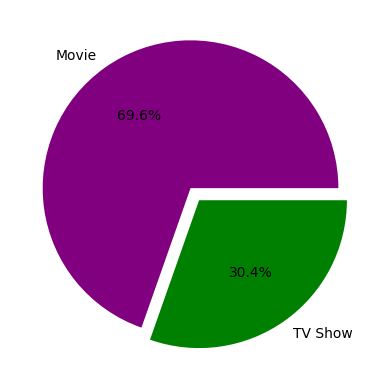

In [ ]:
 df_type=df_final.groupby(['type']).agg({"title":"nunique"}).reset_index()
 plt.pie(df_type['title'],explode=(0.05,0.05), labels=df_type['type'],colors=['purple','green'],autopct='%.1f%%')
 plt.show()

Almost 70% of the data constitutes Movies while rest 30% are TV Shows. Clearly movies constitute the lion's share of the business of the platform

# <font color='black'>*Univariate analysis on counts of each columns*</font>



In [ ]:
df_genre=df_final.groupby(['listed_in']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:5]
df_genre

,listed_in,title
13,International Movies,2624
49,Dramas,1600
44,Comedies,1210
37,Action & Adventure,859
47,Documentaries,829


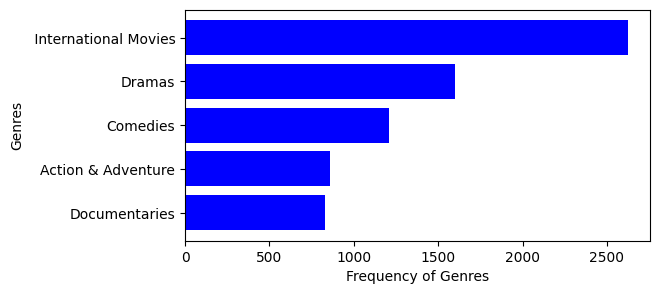

In [ ]:
plt.figure(figsize=(6,3))
plt.barh(df_genre[::-1]['listed_in'], df_genre[::-1]['title'],color=['blue'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

International Movies, Dramas, Comedies, Action & Adventure and Documentaries make up top 5 Genres on the platform

In [ ]:
df_final.groupby(['country']).agg({"title":"nunique"}).sort_values(by=['title'],ascending=False)[:10]

,title
country,
United States,3764
India,1093
United Kingdom,650
United States,490
Japan,278
Canada,277
France,221
South Korea,214
Unknown Country,200


In [ ]:
df_final['country'].unique()

array(['United States', 'South Africa', 'France', 'India', ' Argentina',
       ' Ghana', ' Burkina Faso', ' United Kingdom', ' Germany',
       ' Ethiopia', 'United Kingdom', 'Unknown Country', 'Thailand',
       'Germany', ' Czech Republic', 'Brazil', 'Mexico', ' France',
       ' United States', 'Turkey', 'Australia', ' India', ' Bangladesh',
       ' Belgium', 'Finland', 'China', ' Canada', ' Japan', 'Nigeria',
       'Japan', 'Spain', 'Belgium', 'Sweden', ' Nigeria', 'South Korea',
       ' Singapore', ' Australia', 'Philippines', ' Mexico', ' Italy',
       ' Romania', 'Argentina', ' Venezuela', ' South Africa',
       ' Hong Kong', 'Russia', 'Canada', 'Hong Kong', ' China', 'Italy',
       '', ' South Korea', 'Ireland', 'Egypt', 'Taiwan', ' Sweden',
       ' Nepal', 'New Zealand', ' Brazil', ' Greece', 'Jordan',
       'Colombia', 'Switzerland', 'Israel', ' Spain', 'Bulgaria',
       ' Algeria', ' United Arab Emirates', 'Poland', ' Israel',
       'Saudi Arabia', 'Indonesia', ' 

In [ ]:
df_final['country'] = df_final['country'].str.strip() #Removing Duplicates

In [ ]:
df_final.groupby(['country']).agg({"title":"nunique"}).sort_values(by=['title'],ascending=False)[:10]


,title
country,
United States,4249
India,1131
United Kingdom,829
Canada,459
France,412
Japan,337
Spain,240
South Korea,234
Germany,233


United States, India, United Kingdom are top 3 markets of Netflix

In [ ]:
df_rating = df_final.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:5]
df_rating

,rating,title
8,TV-MA,3207
6,TV-14,2160
9,TV-PG,863
5,R,799
4,PG-13,490


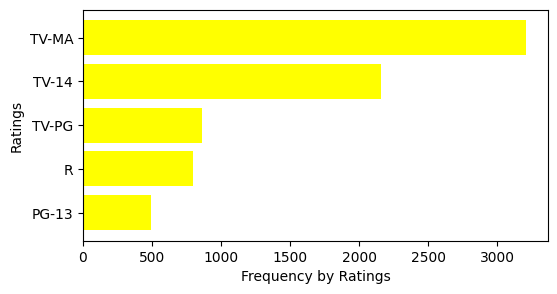

In [ ]:
plt.figure(figsize=(6,3))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'],color=['yellow'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()

Top 3 ratings suggest Netflix releases more of a matured content than any other content

In [ ]:
df_final.groupby(['duration']).agg({"title":"nunique"})

,title
duration,
1 Season,1793
10,1
10 Seasons,7
100,108
101,116
...,...
95,137
96,130
97,146


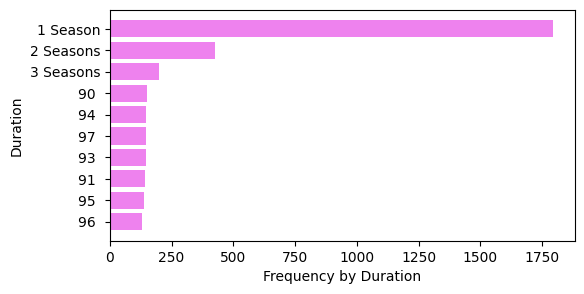

In [ ]:
df_duration=df_final.groupby(['duration']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(6,3))
plt.barh(df_duration[::-1]['duration'], df_duration[::-1]['title'],color=['violet'])
plt.xlabel('Frequency by Duration')
plt.ylabel('Duration')
plt.show()

In [ ]:
df_final.groupby(['cast']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]

,cast,title
38982,Unknown actor,825
2612,Anupam Kher,39
26941,Rupa Bhimani,31
30303,Takahiro Sakurai,30
15541,Julie Tejwani,28
23624,Om Puri,27
25410,Rajesh Kava,26
38445,Shah Rukh Khan,26
4186,Boman Irani,25
23956,Paresh Rawal,25


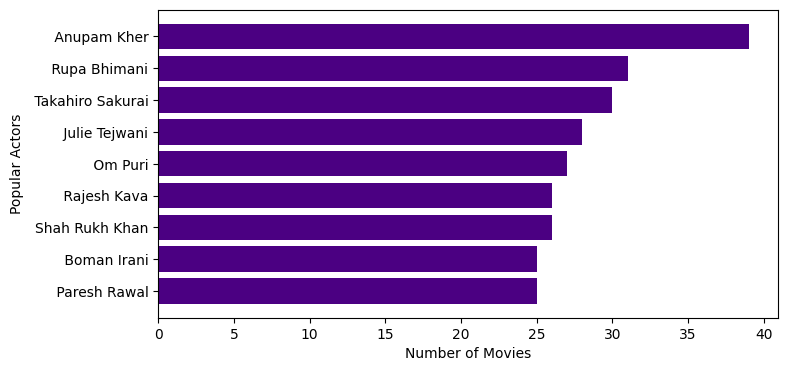

In [ ]:
df_actors = df_final.groupby(['cast']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_actors = df_actors[df_actors['cast']!='Unknown actor']
plt.figure(figsize=(8,4))
plt.barh(df_actors[::-1]['cast'], df_actors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actors')
plt.show()

In [ ]:
df_final.groupby(['director']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:7]

,director,title
4905,Unknown director,2634
4020,Rajiv Chilaka,22
4067,Raúl Campos,18
261,Jan Suter,18
4651,Suhas Kadav,16
3235,Marcus Raboy,16
2450,Jay Karas,15


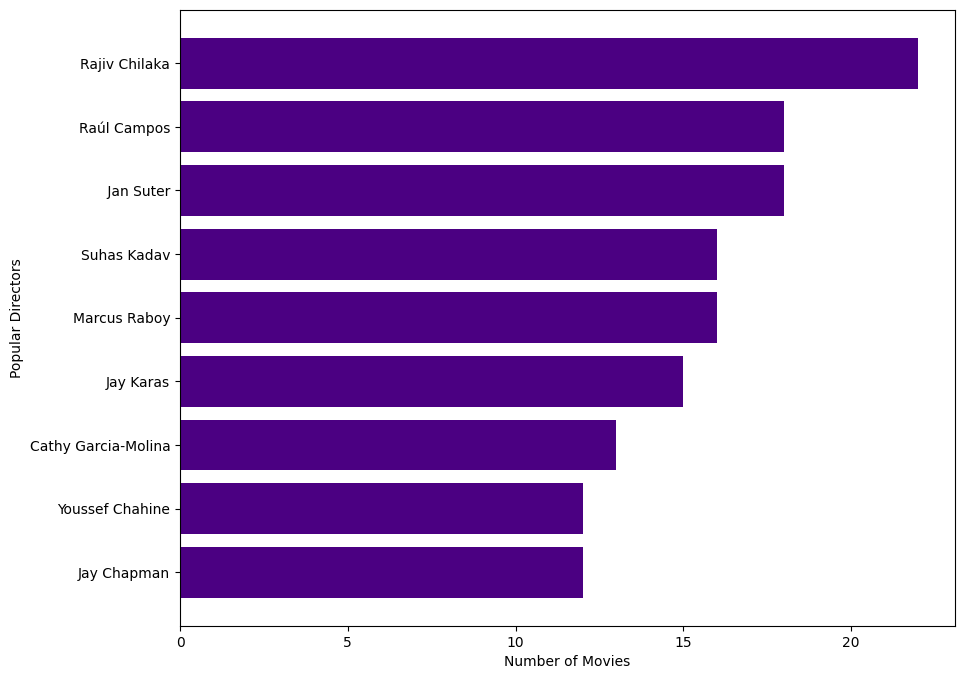

In [ ]:
df_directors = df_final.groupby(['director']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_directors=df_directors[df_directors['director']!='Unknown director']
plt.figure(figsize=(10,8))
plt.barh(df_directors[::-1]['director'], df_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors')
plt.show()

# <font color='black'>*Univariate analysis separately for shows and Movies*</font>



In [ ]:
#Separate analysis wrt to Shows and Movies
df_shows=df_final[df_final['type']=='TV Show']
df_movies=df_final[df_final['type']=='Movie']

In [ ]:
df_shows.groupby(['cast']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]


,cast,title
15362,Unknown actor,350
11974,Takahiro Sakurai,24
13204,Yuki Kaji,17
6136,Junichi Suwabe,17
222,Ai Kayano,17
13923,David Attenborough,14
2573,Daisuke Ono,14
13125,Yoshimasa Hosoya,13
11989,Takehito Koyasu,13
13188,Yuichi Nakamura,13


Top 3 frequenty featured artists(Takahiro Sakurai,Yuki Kaji, Junichi Suwab) in shows are all Japanese voice artists although japan in only 6 largest market for Netflix.

In [ ]:
df_movies.groupby(['cast']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]


,cast,title
27674,Unknown actor,475
1946,Anupam Kher,38
19235,Rupa Bhimani,27
16781,Om Puri,27
27291,Shah Rukh Khan,26
3109,Boman Irani,25
17025,Paresh Rawal,25
11219,Julie Tejwani,24
24247,Akshay Kumar,23
18089,Rajesh Kava,21


All top frequently featured artists in Movies are Indians. This shows popular Indian artists are doing more movies than other contemporaries in other markets

In [ ]:
df_shows.groupby(['listed_in']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]


,listed_in,title
24,International TV Shows,774
13,TV Dramas,696
3,International TV Shows,577
12,TV Comedies,461
22,Crime TV Shows,399
25,Kids' TV,388
7,Romantic TV Shows,338
20,British TV Shows,253
23,Docuseries,221
19,Anime Series,176


In [ ]:
df_movies.groupby(['listed_in']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]


,listed_in,title
10,International Movies,2624
25,Dramas,1600
22,Comedies,1210
18,Action & Adventure,859
24,Documentaries,829
6,Dramas,827
9,Independent Movies,736
13,Romantic Movies,613
20,Children & Family Movies,605
17,Thrillers,512


Both in Movies and Shows category- International shows, Dramas and Comedies are most featured content.Addtionally for movies they are more featured than Action Adventures, Romantic and thrillers

In [ ]:
df_movies.groupby(['director']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]


,director,title
4677,Unknown director,188
3818,Rajiv Chilaka,22
234,Jan Suter,18
3865,Raúl Campos,18
4429,Suhas Kadav,16
2308,Jay Karas,15
3067,Marcus Raboy,15
1289,Cathy Garcia-Molina,13
3135,Martin Scorsese,12
2305,Jay Chapman,12


In [ ]:
df_shows.groupby(['director']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]


,director,title
292,Unknown director,2446
187,Ken Burns,3
86,Alastair Fothergill,3
255,Rob Seidenglanz,2
24,Gautham Vasudev Menon,2
155,Iginio Straffi,2
153,Hsu Fu-chun,2
265,Shin Won-ho,2
183,Jung-ah Im,2
173,Joe Berlinger,2


In [ ]:
df_movies.groupby(['country']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]


,country,title
111,United States,2943
42,India,1045
110,United Kingdom,556
19,Canada,333
33,France,319
35,Germany,189
112,Unknown Country,179
98,Spain,178
50,Japan,137
74,Nigeria,128


US, India and UK are top 3 markets in Movies category for Netflix

In [ ]:
df_shows.groupby(['country']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]


,country,title
64,United States,1306
63,United Kingdom,273
31,Japan,200
53,South Korea,171
9,Canada,126
20,France,93
26,India,86
58,Taiwan,72
2,Australia,66
54,Spain,62


In shows US, UK, Japa, South Korea are top 4 markets while India comesa at 7

In [ ]:
df_movies.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]


,rating,title
8,TV-MA,2062
6,TV-14,1427
5,R,797
9,TV-PG,540
4,PG-13,490
3,PG,287
11,TV-Y7,139
10,TV-Y,131
7,TV-G,126
2,NR,78


In [ ]:
df_shows.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]


,rating,title
4,TV-MA,1145
2,TV-14,733
5,TV-PG,323
7,TV-Y7,195
6,TV-Y,176
3,TV-G,94
0,NR,5
1,R,2
8,TV-Y7-FV,1


Matured content features most both in TV shows and Movies categories

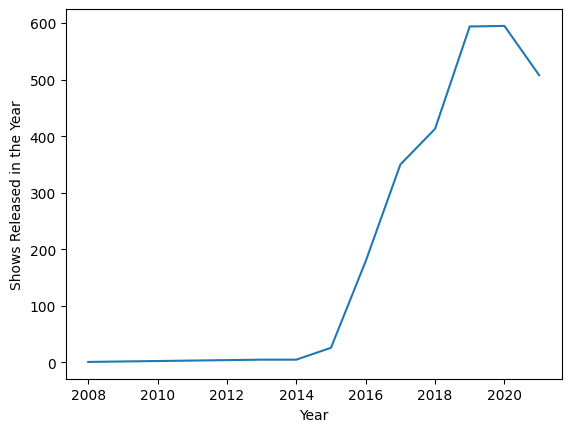

In [ ]:
df_year=df_shows.groupby(['year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='year', y='title')
plt.ylabel("Shows Released in the Year")
plt.xlabel("Year")
plt.show()

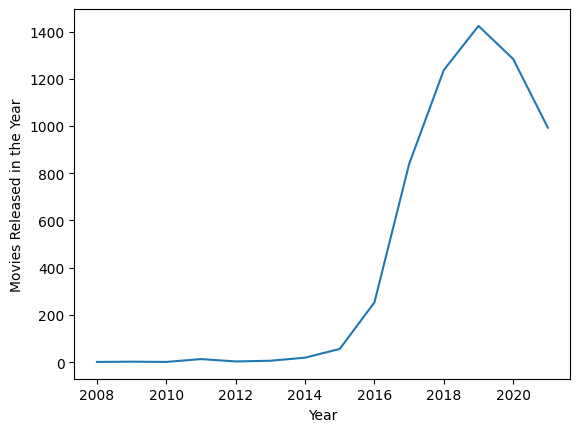

In [ ]:
df_year=df_movies.groupby(['year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='year', y='title')
plt.ylabel("Movies Released in the Year")
plt.xlabel("Year")
plt.show()

MOvies as well as Show releases are declining since 2019 in Overall

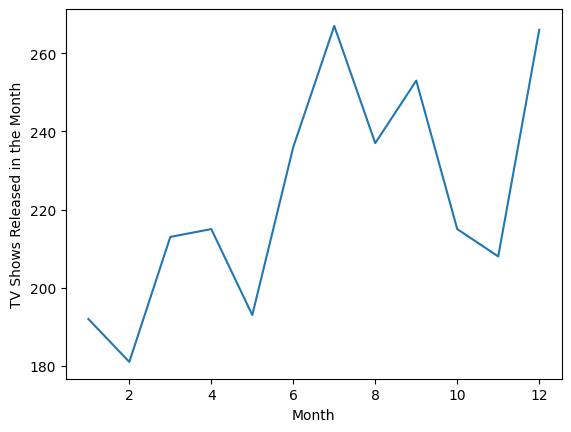

In [ ]:
df_month=df_shows.groupby(['month_added']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_month, x='month_added', y='title')
plt.ylabel("TV Shows Released in the Month")
plt.xlabel("Month")
plt.show()

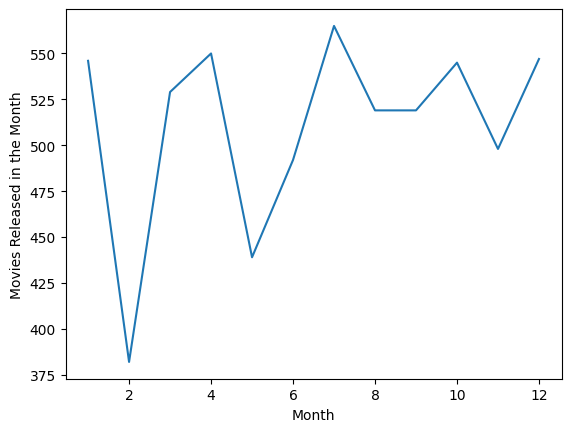

In [ ]:
df_month=df_movies.groupby(['month_added']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_month, x='month_added', y='title')
plt.ylabel("Movies Released in the Month")
plt.xlabel("Month")
plt.show()

Most additions of both TV shows and Movies happen in the months of July and December!

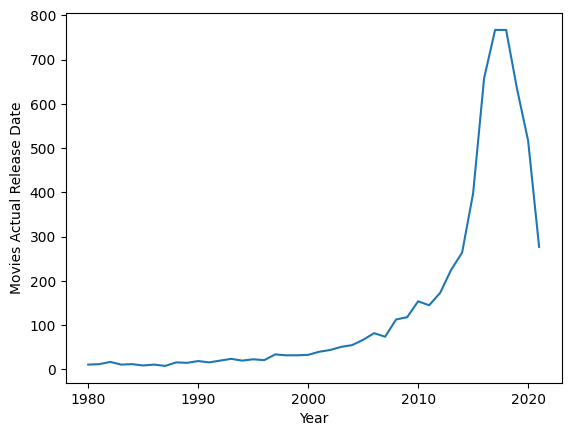

In [ ]:
df_release_year=df_movies[df_movies['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_release_year, x='release_year', y='title')
plt.ylabel("Movies Actual Release Date")
plt.xlabel("Year")
plt.show()

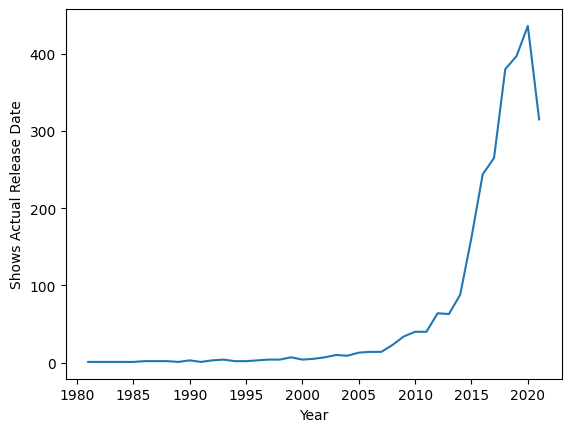

In [ ]:
df_release_year=df_shows[df_shows['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_release_year, x='release_year', y='title')
plt.ylabel("Shows Actual Release Date")
plt.xlabel("Year")
plt.show()

In commensurate with platform additons releases are also dropping since 2019. Covid seems to have hit the Entertainment industry harder.

# <font color='black'>*Analysis on Top market countries*</font>



In [ ]:
#below countries will be analyzed for both shows and movies
shows_and_movies=['United States','India','United Kingdom']
#below countries will be only analyzed on basis of shows
only_shows=['Japan','South Korea']

 ## <font color='black'>**USA**</font>



In [ ]:
#Analyzing USA for both shows and movies
df_usa_shows=df_final[df_final['country']=='United States'][df_final[df_final['country']=='United States']['type']=='TV Show']
df_usa_movies=df_final[df_final['country']=='United States'][df_final[df_final['country']=='United States']['type']=='Movie']

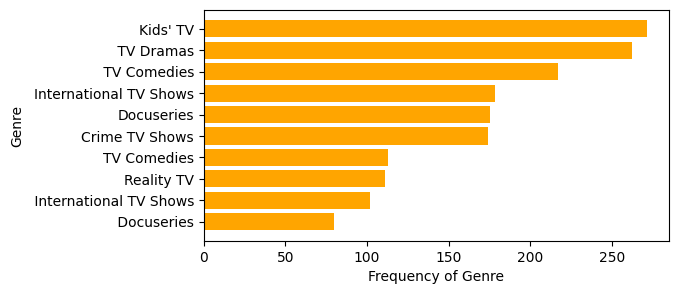

In [ ]:
df_genre=df_usa_shows.groupby(['listed_in']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(6,3))
plt.barh(df_genre[::-1]['listed_in'], df_genre[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of Genre')
plt.ylabel('Genre')
plt.show()

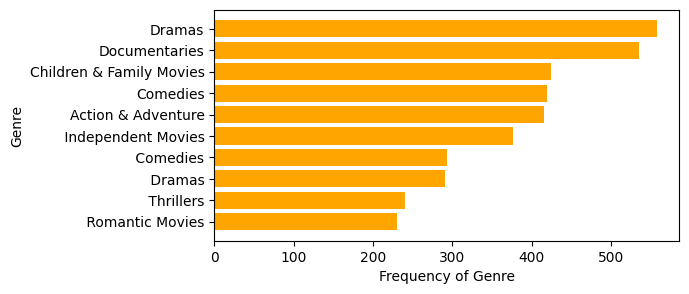

In [ ]:
df_genre=df_usa_movies.groupby(['listed_in']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(6,3))
plt.barh(df_genre[::-1]['listed_in'], df_genre[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of Genre')
plt.ylabel('Genre')
plt.show()

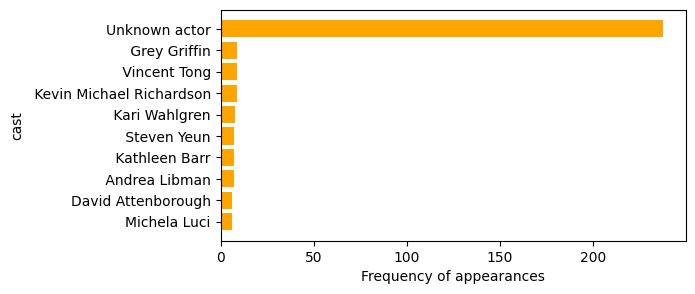

In [ ]:
df_cast=df_usa_shows.groupby(['cast']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(6,3))
plt.barh(df_cast[::-1]['cast'], df_cast[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of appearances')
plt.ylabel('cast')
plt.show()

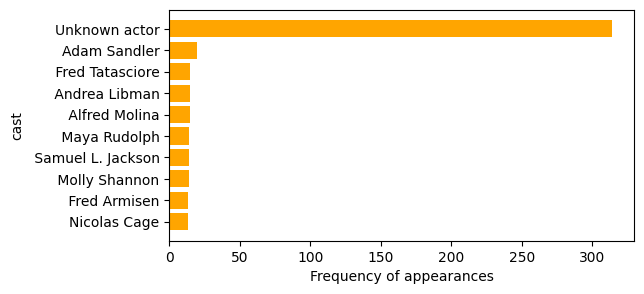

In [ ]:
df_cast=df_usa_movies.groupby(['cast']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(6,3))
plt.barh(df_cast[::-1]['cast'], df_cast[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of appearances')
plt.ylabel('cast')
plt.show()

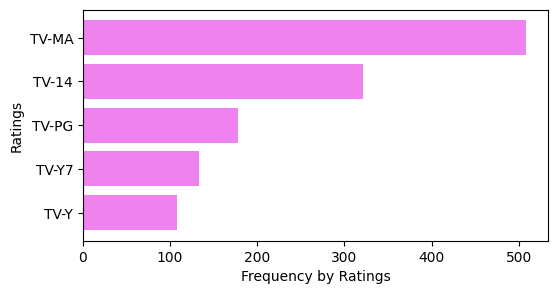

In [ ]:
df_rating=df_usa_shows.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:5]
plt.figure(figsize=(6,3))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'],color=['violet'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()

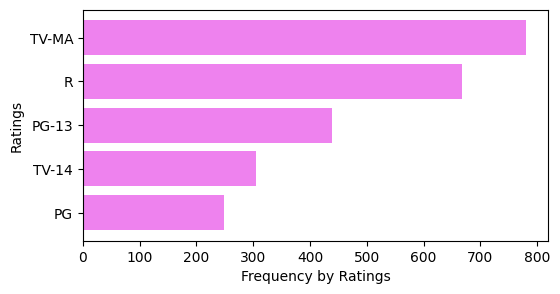

In [ ]:
df_rating=df_usa_movies.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:5]
plt.figure(figsize=(6,3))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'],color=['violet'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()

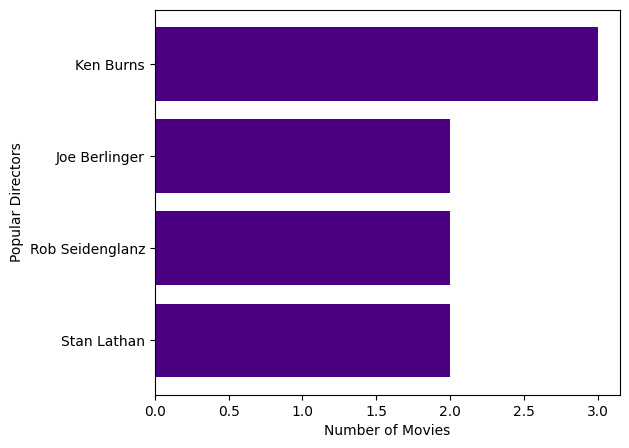

In [ ]:
df_directors=df_usa_shows.groupby(['director']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:5]
df_directors = df_directors[df_directors['director'].notna()]
df_directors=df_directors[df_directors['director']!='Unknown director']
plt.figure(figsize=(6,5))
plt.barh(df_directors[::-1]['director'], df_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors')
plt.show()

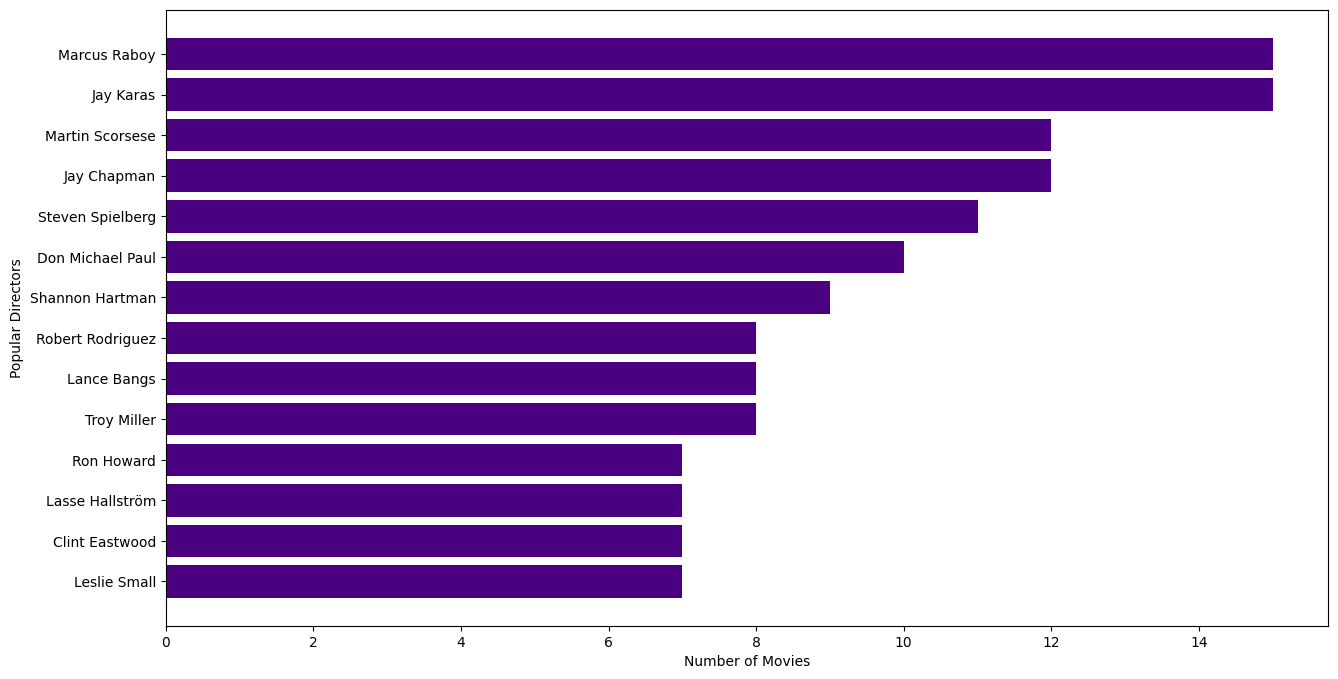

In [ ]:
df_directors=df_usa_movies.groupby(['director']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
df_directors=df_directors[df_directors['director']!='Unknown director']
plt.figure(figsize=(15,8))
plt.barh(df_directors[::-1]['director'], df_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors')
plt.show()

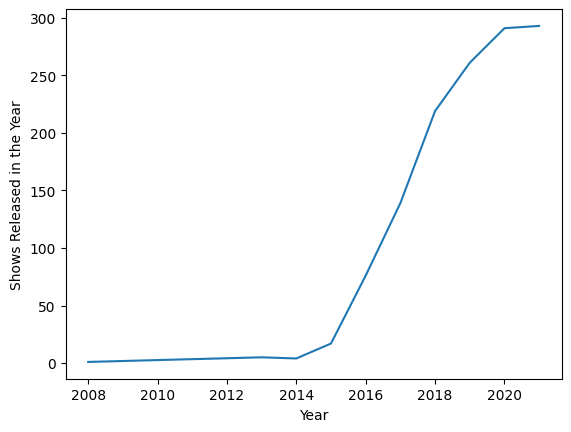

In [ ]:
df_year=df_usa_shows.groupby(['year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='year', y='title')
plt.ylabel("Shows Released in the Year")
plt.xlabel("Year")
plt.show()

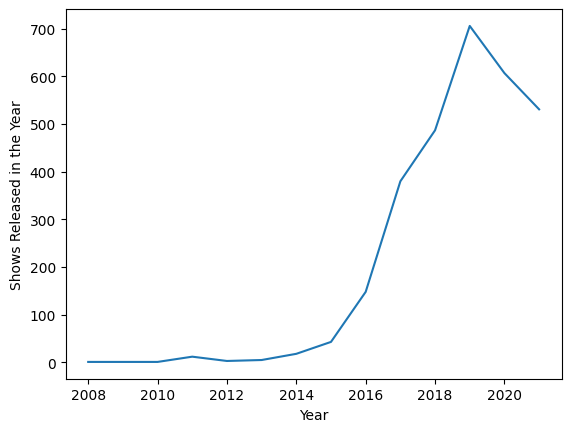

In [ ]:
df_year=df_usa_movies.groupby(['year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='year', y='title')
plt.ylabel("Shows Released in the Year")
plt.xlabel("Year")
plt.show()

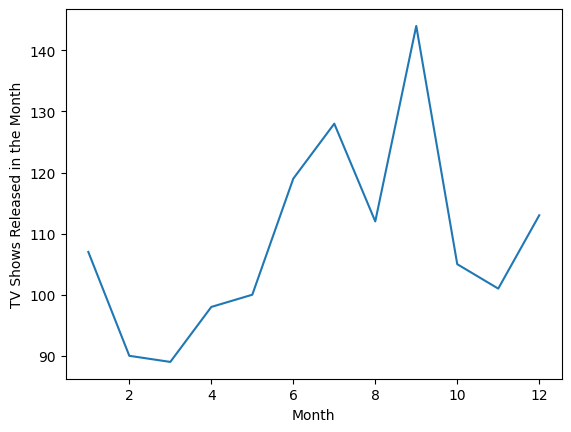

In [ ]:
df_month=df_usa_shows.groupby(['month_added']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_month, x='month_added', y='title')
plt.ylabel("TV Shows Released in the Month")
plt.xlabel("Month")
plt.show()

Most number of shows are added in the september month in USA

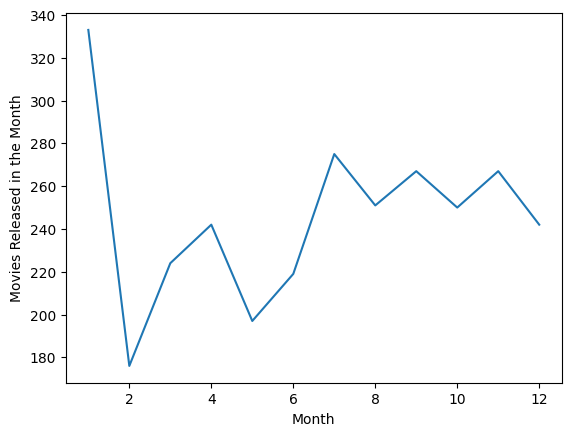

In [ ]:
df_month=df_usa_movies.groupby(['month_added']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_month, x='month_added', y='title')
plt.ylabel("Movies Released in the Month")
plt.xlabel("Month")
plt.show()

While Most number of movies are added in the January Month in USA

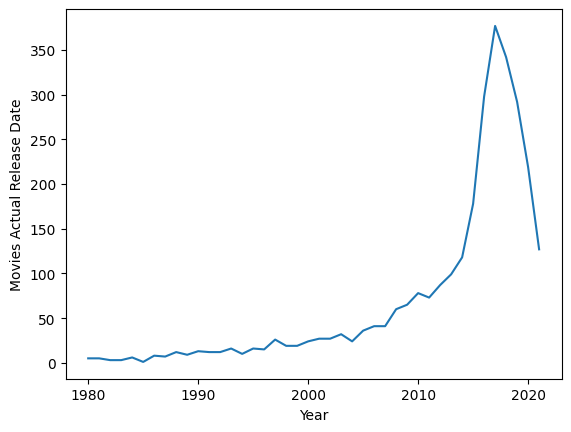

In [ ]:
df_release_year=df_usa_movies[df_usa_movies['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_release_year, x='release_year', y='title')
plt.ylabel("Movies Actual Release Date")
plt.xlabel("Year")
plt.show()

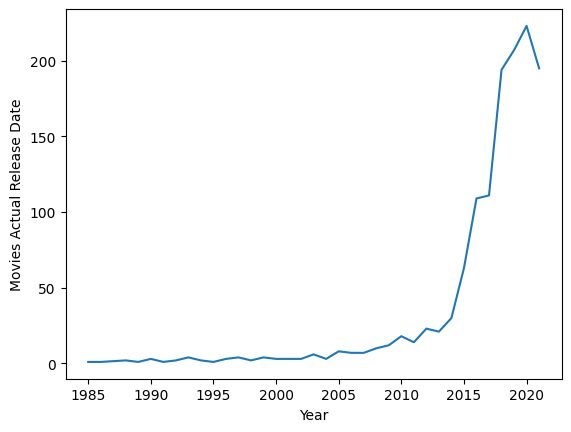

In [ ]:
df_release_year=df_usa_shows[df_usa_shows['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_release_year, x='release_year', y='title')
plt.ylabel("Movies Actual Release Date")
plt.xlabel("Year")
plt.show()

In consistent with the Overall trend Movie and show releases declining since 2019

In [ ]:
df_usa_movies.head()

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,description,Modified_Added_date,month_added,week_Added,year
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown actor,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90,"As her father nears the end of his life, filmm...",2021-09-25,9,38,2021
159,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,United States,Children & Family Movies,s7,Movie,"September 24, 2021",2021,PG,91,Equestria's divided. But a bright-eyed hero be...,2021-09-24,9,38,2021
160,My Little Pony: A New Generation,Robert Cullen,Kimiko Glenn,United States,Children & Family Movies,s7,Movie,"September 24, 2021",2021,PG,91,Equestria's divided. But a bright-eyed hero be...,2021-09-24,9,38,2021
161,My Little Pony: A New Generation,Robert Cullen,James Marsden,United States,Children & Family Movies,s7,Movie,"September 24, 2021",2021,PG,91,Equestria's divided. But a bright-eyed hero be...,2021-09-24,9,38,2021
163,My Little Pony: A New Generation,Robert Cullen,Liza Koshy,United States,Children & Family Movies,s7,Movie,"September 24, 2021",2021,PG,91,Equestria's divided. But a bright-eyed hero be...,2021-09-24,9,38,2021


In [ ]:
df_usa_movies['Actor_Director_Combination'] = df_usa_movies.cast.str.cat(df_usa_movies.director, sep=' and ')
df_usa_movies_subset=df_usa_movies[df_usa_movies['cast']!='Unknown actor']
df_usa_movies_subset=df_usa_movies_subset[df_usa_movies_subset['director']!='Unknown director']
df_usa_movies_subset.head()

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,description,Modified_Added_date,month_added,week_Added,year,Actor_Director_Combination
159,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,United States,Children & Family Movies,s7,Movie,"September 24, 2021",2021,PG,91,Equestria's divided. But a bright-eyed hero be...,2021-09-24,9,38,2021,Vanessa Hudgens and Robert Cullen
160,My Little Pony: A New Generation,Robert Cullen,Kimiko Glenn,United States,Children & Family Movies,s7,Movie,"September 24, 2021",2021,PG,91,Equestria's divided. But a bright-eyed hero be...,2021-09-24,9,38,2021,Kimiko Glenn and Robert Cullen
161,My Little Pony: A New Generation,Robert Cullen,James Marsden,United States,Children & Family Movies,s7,Movie,"September 24, 2021",2021,PG,91,Equestria's divided. But a bright-eyed hero be...,2021-09-24,9,38,2021,James Marsden and Robert Cullen
163,My Little Pony: A New Generation,Robert Cullen,Liza Koshy,United States,Children & Family Movies,s7,Movie,"September 24, 2021",2021,PG,91,Equestria's divided. But a bright-eyed hero be...,2021-09-24,9,38,2021,Liza Koshy and Robert Cullen
164,My Little Pony: A New Generation,Robert Cullen,Ken Jeong,United States,Children & Family Movies,s7,Movie,"September 24, 2021",2021,PG,91,Equestria's divided. But a bright-eyed hero be...,2021-09-24,9,38,2021,Ken Jeong and Robert Cullen


In [ ]:
df_usa_movies_subset.groupby(['Actor_Director_Combination']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:20]

,Actor_Director_Combination,title
497,Alexa PenaVega and Robert Rodriguez,5
21578,Kevin Hart and Leslie Small,5
10526,Kate Higgins and William Lau,4
16621,Rory Markham and Mike Gunther,4
15902,Rebecca Shoichet and Ishi Rudell,4
974,Andrea Libman and Ishi Rudell,4
843,America Young and William Lau,4
7487,Hugo Weaving and Lilly Wachowski,4
22240,Robert De Niro and Martin Scorsese,4
17807,Sonal Kaushal and Prakash Satam,4


In [ ]:
df_usa_shows['Actor_Director_Combination'] = df_usa_shows.cast.str.cat(df_usa_shows.director, sep=' and ')
df_usa_shows_subset=df_usa_shows[df_usa_shows['cast']!='Unknown cast']
df_usa_shows_subset=df_usa_shows_subset[df_usa_shows_subset['director']!='Unknown director']
df_usa_shows_subset.head()

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,description,Modified_Added_date,month_added,week_Added,year,Actor_Director_Combination
111,Midnight Mass,Mike Flanagan,Kate Siegel,United States,TV Dramas,s6,TV Show,"September 24, 2021",2021,TV-MA,1 Season,The arrival of a charismatic young priest brin...,2021-09-24,9,38,2021,Kate Siegel and Mike Flanagan
112,Midnight Mass,Mike Flanagan,Kate Siegel,United States,TV Horror,s6,TV Show,"September 24, 2021",2021,TV-MA,1 Season,The arrival of a charismatic young priest brin...,2021-09-24,9,38,2021,Kate Siegel and Mike Flanagan
113,Midnight Mass,Mike Flanagan,Kate Siegel,United States,TV Mysteries,s6,TV Show,"September 24, 2021",2021,TV-MA,1 Season,The arrival of a charismatic young priest brin...,2021-09-24,9,38,2021,Kate Siegel and Mike Flanagan
114,Midnight Mass,Mike Flanagan,Zach Gilford,United States,TV Dramas,s6,TV Show,"September 24, 2021",2021,TV-MA,1 Season,The arrival of a charismatic young priest brin...,2021-09-24,9,38,2021,Zach Gilford and Mike Flanagan
115,Midnight Mass,Mike Flanagan,Zach Gilford,United States,TV Horror,s6,TV Show,"September 24, 2021",2021,TV-MA,1 Season,The arrival of a charismatic young priest brin...,2021-09-24,9,38,2021,Zach Gilford and Mike Flanagan


In [ ]:
df_usa_shows_subset.groupby(['Actor_Director_Combination']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:5]

,Actor_Director_Combination,title
401,Dave Chappelle and Stan Lathan,2
478,Unknown actor and Ken Burns,2
339,Samara Naeymi and Iginio Straffi,1
338,Samantha Smith and Phil Sgriccia,1
337,Samantha Sloyan and Mike Flanagan,1


 ## <font color='black'>**INDIA**</font>



In [ ]:
#Analyzing India for both shows and movies
df_India_shows=df_final[df_final['country']=='India'][df_final[df_final['country']=='India']['type']=='TV Show']
df_India_movies=df_final[df_final['country']=='India'][df_final[df_final['country']=='India']['type']=='Movie']

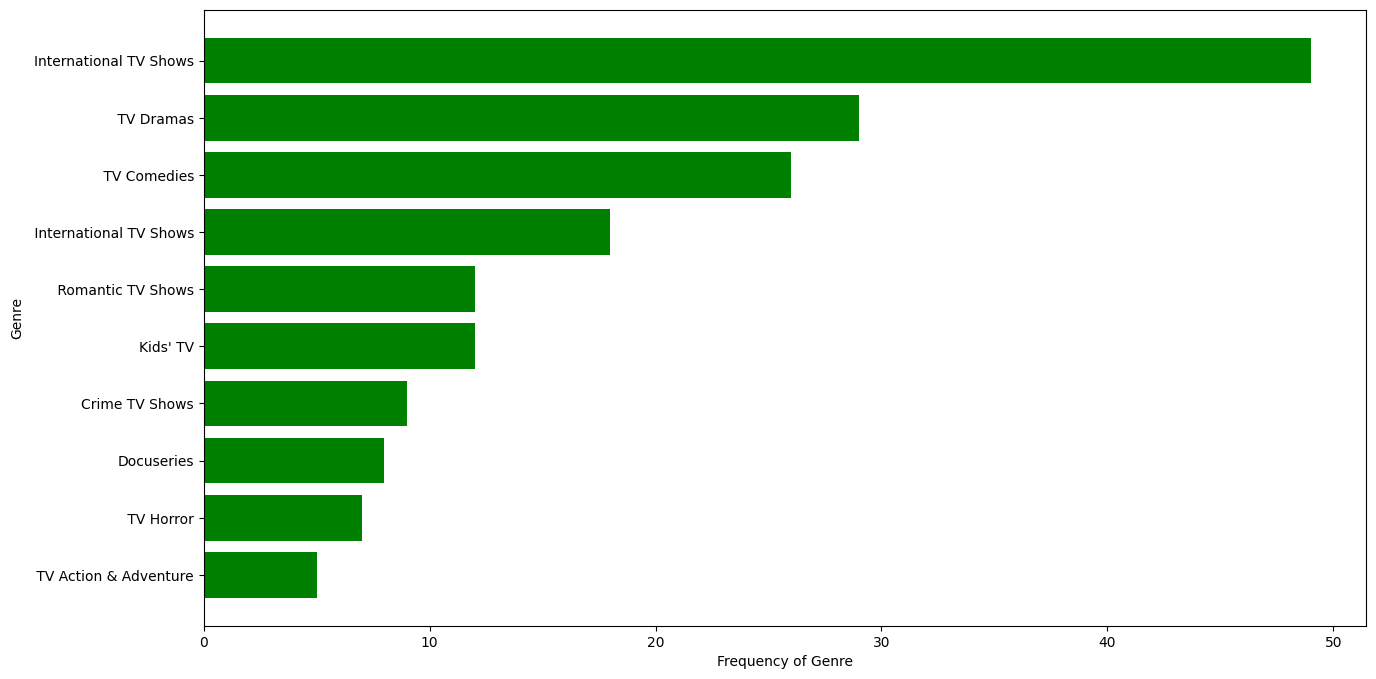

In [ ]:
df_genre=df_India_shows.groupby(['listed_in']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['listed_in'], df_genre[::-1]['title'],color=['green'])
plt.xlabel('Frequency of Genre')
plt.ylabel('Genre')
plt.show()

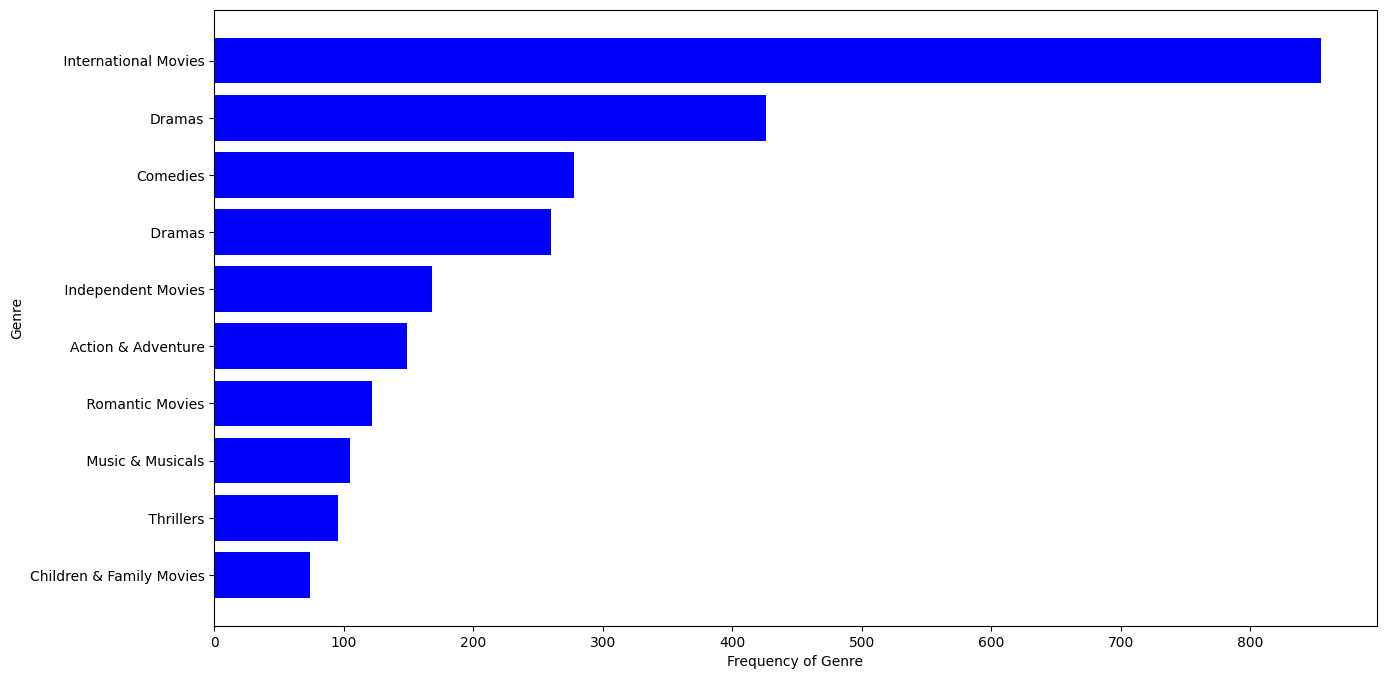

In [ ]:
df_genre=df_India_movies.groupby(['listed_in']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['listed_in'], df_genre[::-1]['title'],color=['blue'])
plt.xlabel('Frequency of Genre')
plt.ylabel('Genre')
plt.show()

This shows Indian's watching International Tv Shows and Movies contributing to the Overall trend  

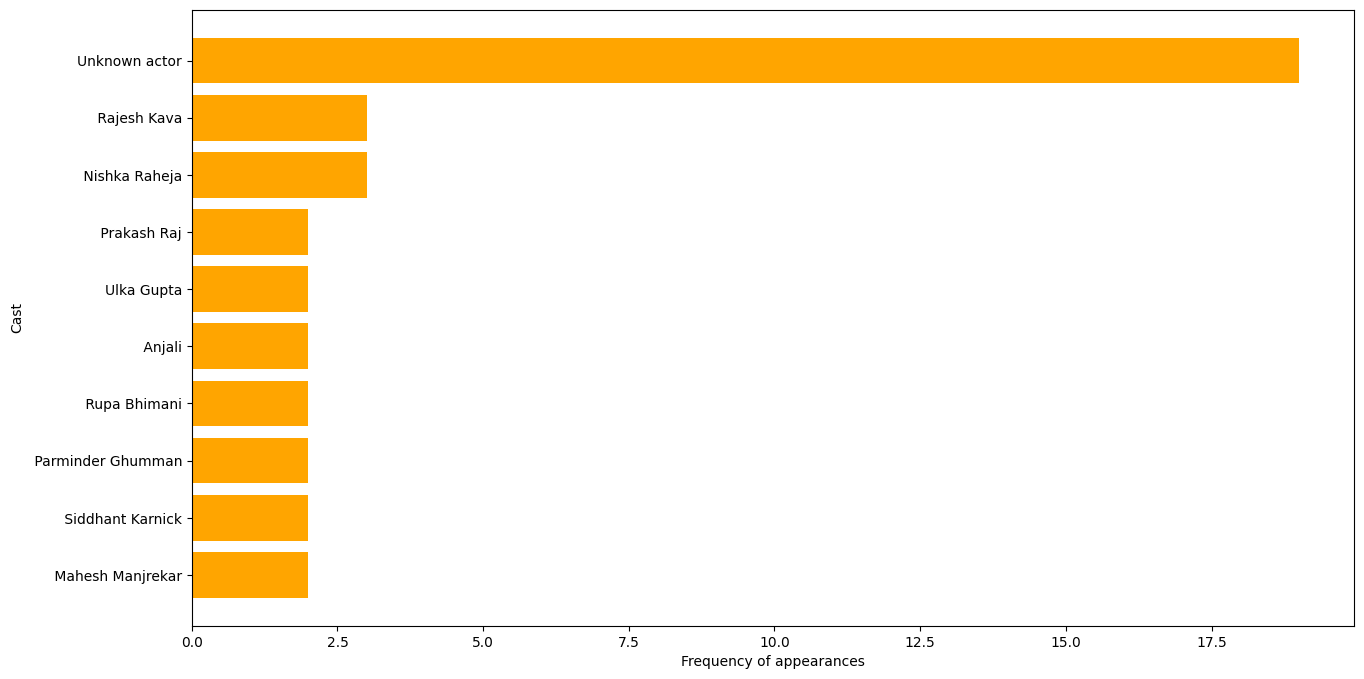

In [ ]:
df_cast=df_India_shows.groupby(['cast']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
plt.barh(df_cast[::-1]['cast'], df_cast[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of appearances')
plt.ylabel('Cast')
plt.show()


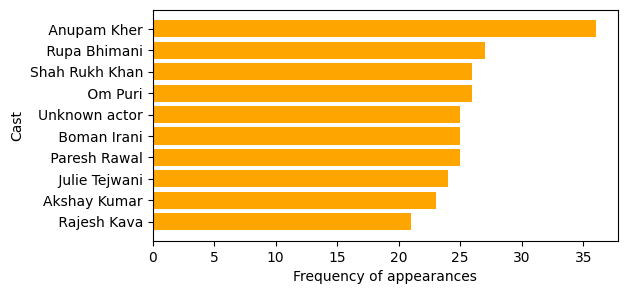

In [ ]:
df_cast=df_India_movies.groupby(['cast']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(6,3))
plt.barh(df_cast[::-1]['cast'], df_cast[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of appearances')
plt.ylabel('Cast')
plt.show()


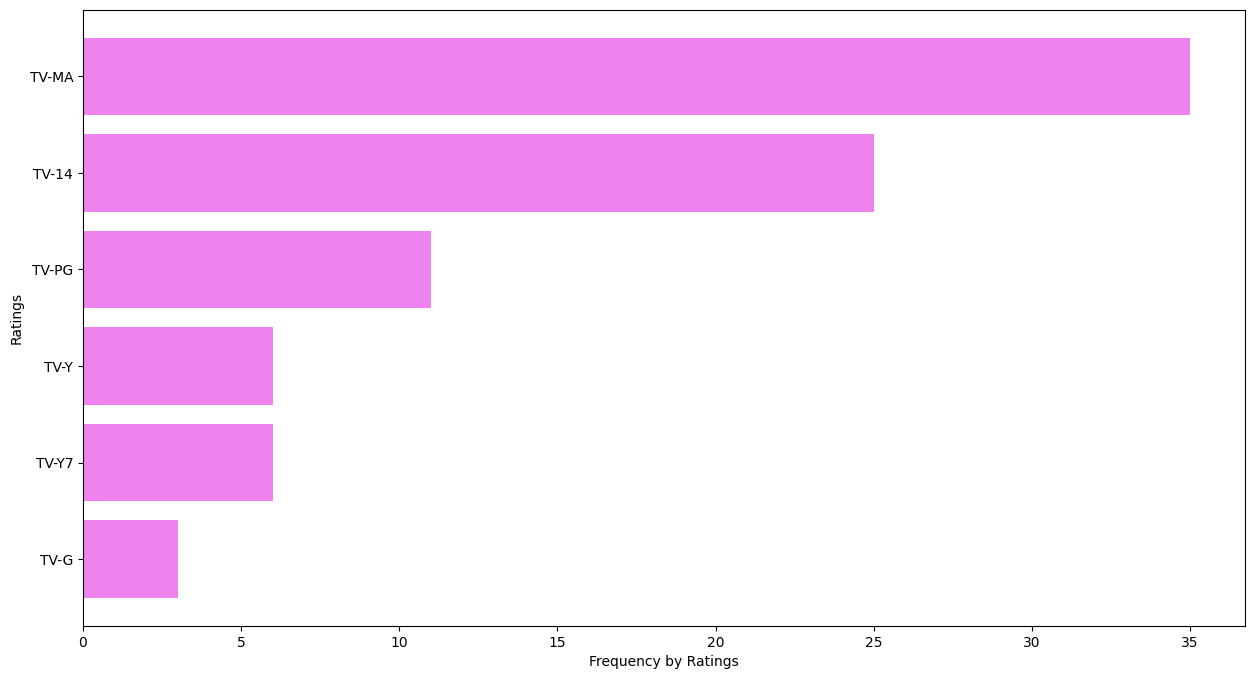

In [ ]:
df_rating=df_India_shows.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'],color=['violet'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()


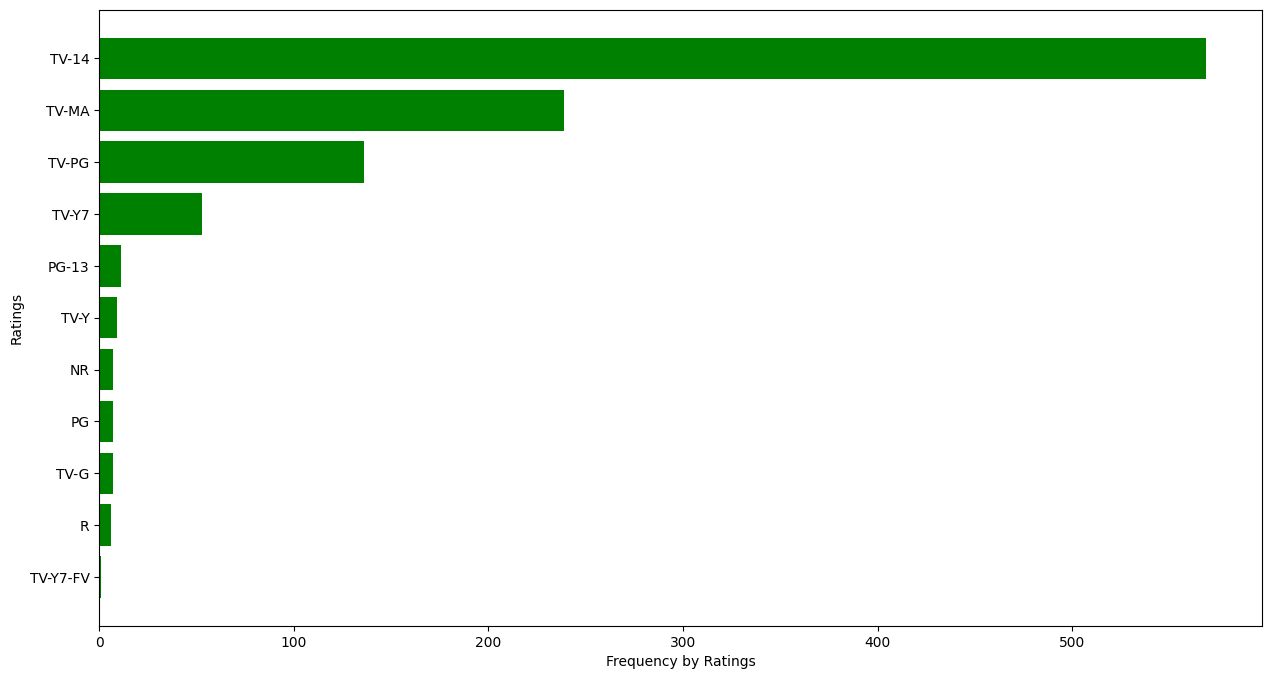

In [ ]:
df_rating=df_India_movies.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'],color=['green'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()


Even among India Matured content is mostly featured as with the Overall trend and in comparision to USA

In [ ]:
df_India_shows.groupby(['director']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]

,director,title
32,Unknown director,73
9,Gautham Vasudev Menon,2
0,Abhishek Chaubey,1
1,Anurag Kashyap,1
3,B. V. Nandini Reddy,1
2,Arvind Swamy,1
6,Deepti Kakkar,1
4,Caroline Sá,1
7,Elaine McMillion Sheldon,1
8,Fahad Mustafa,1


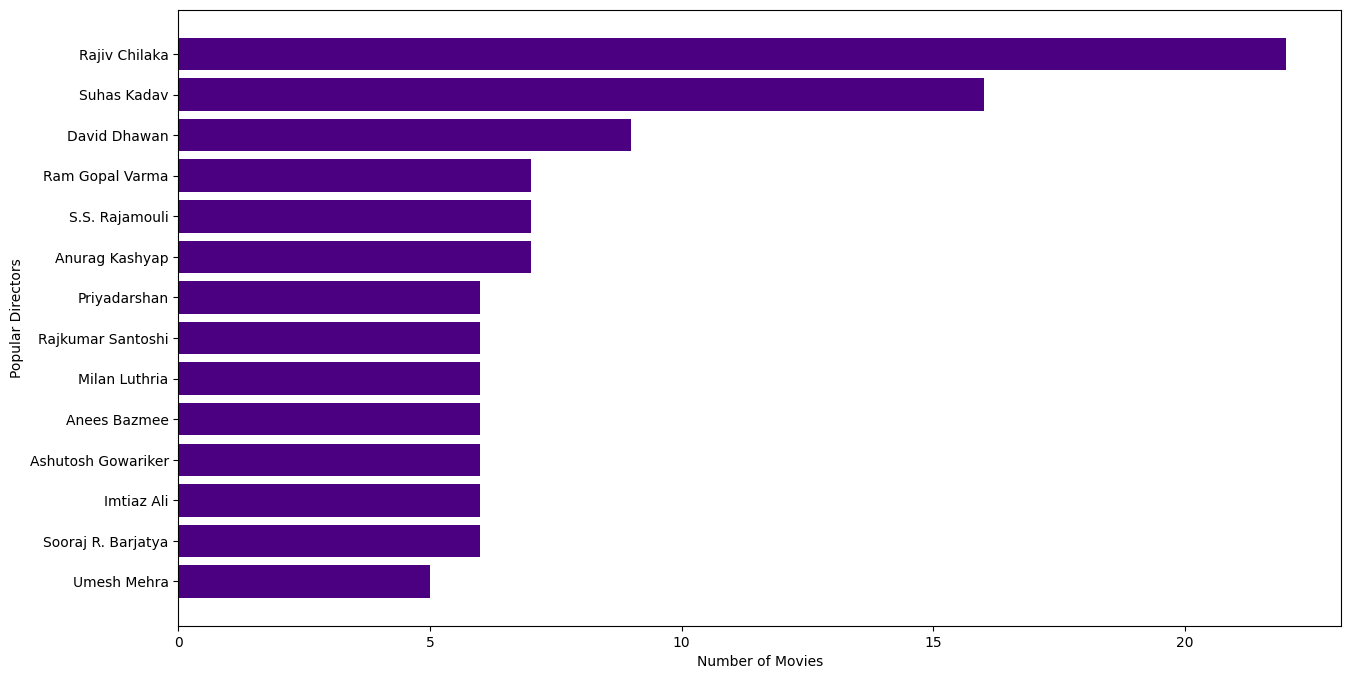

In [ ]:
df_directors=df_India_movies.groupby(['director']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
df_directors=df_directors[df_directors['director']!='Unknown director']
plt.figure(figsize=(15,8))
plt.barh(df_directors[::-1]['director'], df_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors')
plt.show()


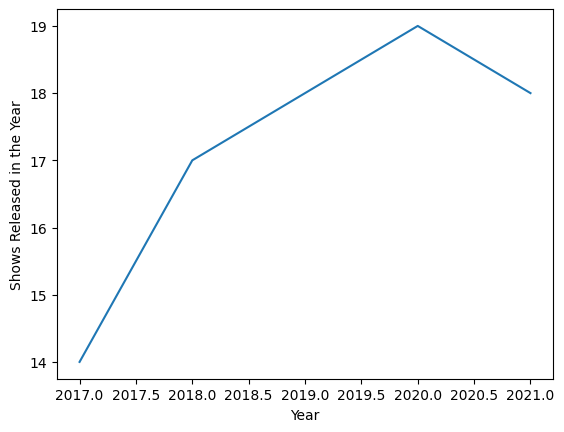

In [ ]:
df_year=df_India_shows.groupby(['year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='year', y='title')
plt.ylabel("Shows Released in the Year")
plt.xlabel("Year")
plt.show()


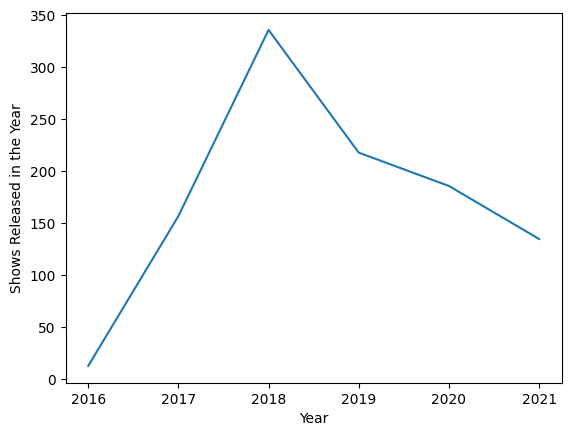

In [ ]:
df_year=df_India_movies.groupby(['year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='year', y='title')
plt.ylabel("Shows Released in the Year")
plt.xlabel("Year")
plt.show()


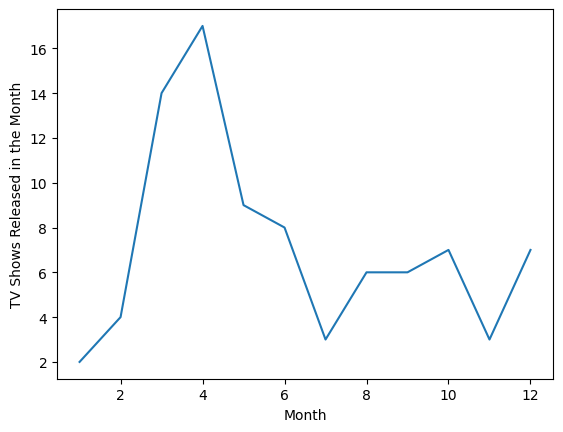

In [ ]:
df_month=df_India_shows.groupby(['month_added']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_month, x='month_added', y='title')
plt.ylabel("TV Shows Released in the Month")
plt.xlabel("Month")
plt.show()


Most shows are being added in the Month of April

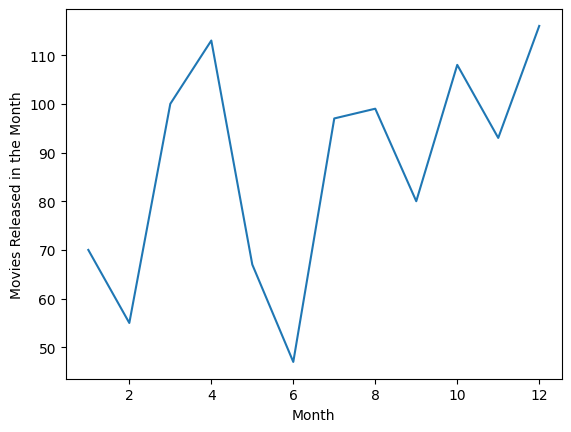

In [ ]:
df_month=df_India_movies.groupby(['month_added']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_month, x='month_added', y='title')
plt.ylabel("Movies Released in the Month")
plt.xlabel("Month")
plt.show()


Most movies are added to the platform in April, October and December

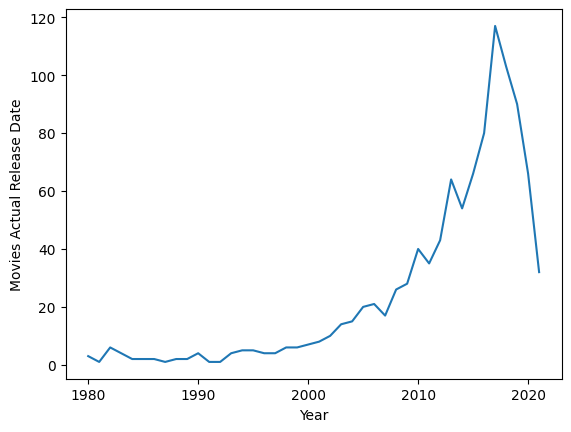

In [ ]:
df_release_year=df_India_movies[df_India_movies['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_release_year, x='release_year', y='title')
plt.ylabel("Movies Actual Release Date")
plt.xlabel("Year")
plt.show()


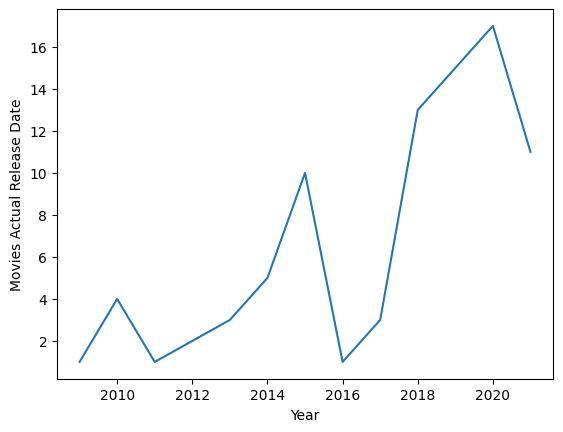

In [ ]:
df_release_year=df_India_shows[df_India_shows['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_release_year, x='release_year', y='title')
plt.ylabel("Movies Actual Release Date")
plt.xlabel("Year")
plt.show()


In [ ]:
df_India_movies['Actor_Director_Combination'] = df_India_movies.cast.str.cat(df_India_movies.director, sep=' and ')
df_India_movies_subset=df_India_movies[df_India_movies['cast']!='Unknown actor']
df_India_movies_subset=df_India_movies_subset[df_India_movies_subset['director']!='Unknown director']
df_India_movies_subset.head()


,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,description,Modified_Added_date,month_added,week_Added,year,Actor_Director_Combination
621,Avvai Shanmughi,K.S. Ravikumar,Kamal Hassan,India,Comedies,s23,Movie,"September 21, 2021",1996,TV-PG,161,Newly divorced and denied visitation rights wi...,2021-09-21,9,38,2021,Kamal Hassan and K.S. Ravikumar
622,Avvai Shanmughi,K.S. Ravikumar,Kamal Hassan,India,International Movies,s23,Movie,"September 21, 2021",1996,TV-PG,161,Newly divorced and denied visitation rights wi...,2021-09-21,9,38,2021,Kamal Hassan and K.S. Ravikumar
629,Avvai Shanmughi,K.S. Ravikumar,Nassar,India,Comedies,s23,Movie,"September 21, 2021",1996,TV-PG,161,Newly divorced and denied visitation rights wi...,2021-09-21,9,38,2021,Nassar and K.S. Ravikumar
630,Avvai Shanmughi,K.S. Ravikumar,Nassar,India,International Movies,s23,Movie,"September 21, 2021",1996,TV-PG,161,Newly divorced and denied visitation rights wi...,2021-09-21,9,38,2021,Nassar and K.S. Ravikumar
631,Avvai Shanmughi,K.S. Ravikumar,S.P. Balasubrahmanyam,India,Comedies,s23,Movie,"September 21, 2021",1996,TV-PG,161,Newly divorced and denied visitation rights wi...,2021-09-21,9,38,2021,S.P. Balasubrahmanyam and K.S. Ravikumar


In [ ]:
df_India_movies_subset.groupby(['Actor_Director_Combination']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:20]

,Actor_Director_Combination,title
4349,Rajesh Kava and Rajiv Chilaka,19
2297,Julie Tejwani and Rajiv Chilaka,19
2176,Jigna Bhardwaj and Rajiv Chilaka,18
4783,Rupa Bhimani and Rajiv Chilaka,18
7639,Vatsal Dubey and Rajiv Chilaka,16
6023,Swapnil and Rajiv Chilaka,13
3265,Mousam and Rajiv Chilaka,13
7466,Saurav Chakraborty and Suhas Kadav,8
649,Anushka Shetty and S.S. Rajamouli,7
5137,Sathyaraj and S.S. Rajamouli,7


In [ ]:
df_India_shows['Actor_Director_Combination'] = df_India_shows.cast.str.cat(df_India_shows.director, sep=' and ')
df_India_shows_subset=df_India_shows[df_India_shows['cast']!='Unknown cast']
df_India_shows_subset=df_India_shows_subset[df_India_shows_subset['director']!='Unknown director']
df_India_shows_subset.head()


,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,description,Modified_Added_date,month_added,week_Added,year,Actor_Director_Combination
7005,Navarasa,Bejoy Nambiar,Suriya,India,TV Shows,s298,TV Show,"August 6, 2021",2021,TV-MA,1 Season,"From amusement to awe, the nine human emotions...",2021-08-06,8,31,2021,Suriya and Bejoy Nambiar
7006,Navarasa,Bejoy Nambiar,Vijay Sethupathi,India,TV Shows,s298,TV Show,"August 6, 2021",2021,TV-MA,1 Season,"From amusement to awe, the nine human emotions...",2021-08-06,8,31,2021,Vijay Sethupathi and Bejoy Nambiar
7007,Navarasa,Bejoy Nambiar,Revathy,India,TV Shows,s298,TV Show,"August 6, 2021",2021,TV-MA,1 Season,"From amusement to awe, the nine human emotions...",2021-08-06,8,31,2021,Revathy and Bejoy Nambiar
7008,Navarasa,Bejoy Nambiar,Prakash Raj,India,TV Shows,s298,TV Show,"August 6, 2021",2021,TV-MA,1 Season,"From amusement to awe, the nine human emotions...",2021-08-06,8,31,2021,Prakash Raj and Bejoy Nambiar
7009,Navarasa,Bejoy Nambiar,Siddarth,India,TV Shows,s298,TV Show,"August 6, 2021",2021,TV-MA,1 Season,"From amusement to awe, the nine human emotions...",2021-08-06,8,31,2021,Siddarth and Bejoy Nambiar


In [ ]:
df_India_shows_subset.groupby(['Actor_Director_Combination']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:5]

,Actor_Director_Combination,title
27,Anjali and Gautham Vasudev Menon,2
115,Gautham Vasudev Menon and Gautham Vasudev Menon,2
207,Prakash Raj and Gautham Vasudev Menon,2
263,Revathy and Karthik Subbaraj,1
262,Revathy and Karthik Narain,1


 ## <font color='black'>**United Kingdom**</font>

In [ ]:
df_uk_shows=df_final[df_final['country']=='United Kingdom'][df_final[df_final['country']=='United Kingdom']['type']=='TV Show']
df_uk_movies=df_final[df_final['country']=='United Kingdom'][df_final[df_final['country']=='United Kingdom']['type']=='Movie']


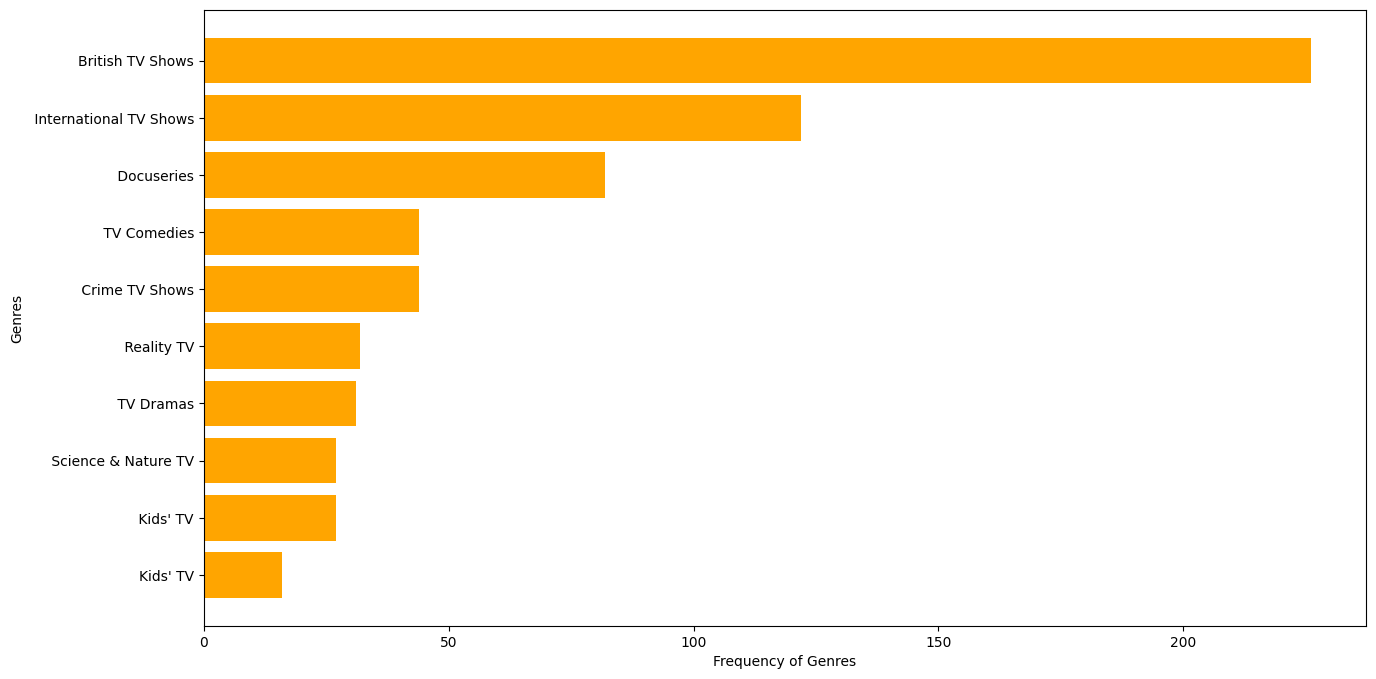

In [ ]:
df_genre=df_uk_shows.groupby(['listed_in']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['listed_in'], df_genre[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()



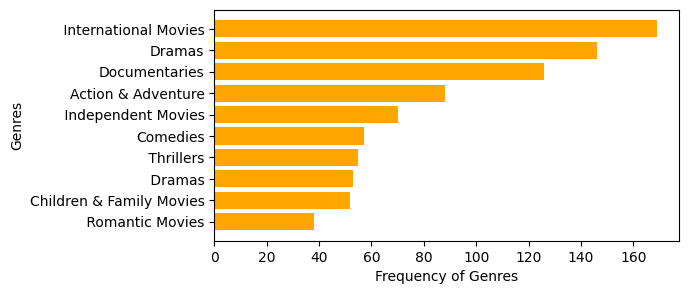

In [ ]:
df_genre=df_uk_movies.groupby(['listed_in']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(6,3))
plt.barh(df_genre[::-1]['listed_in'], df_genre[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()


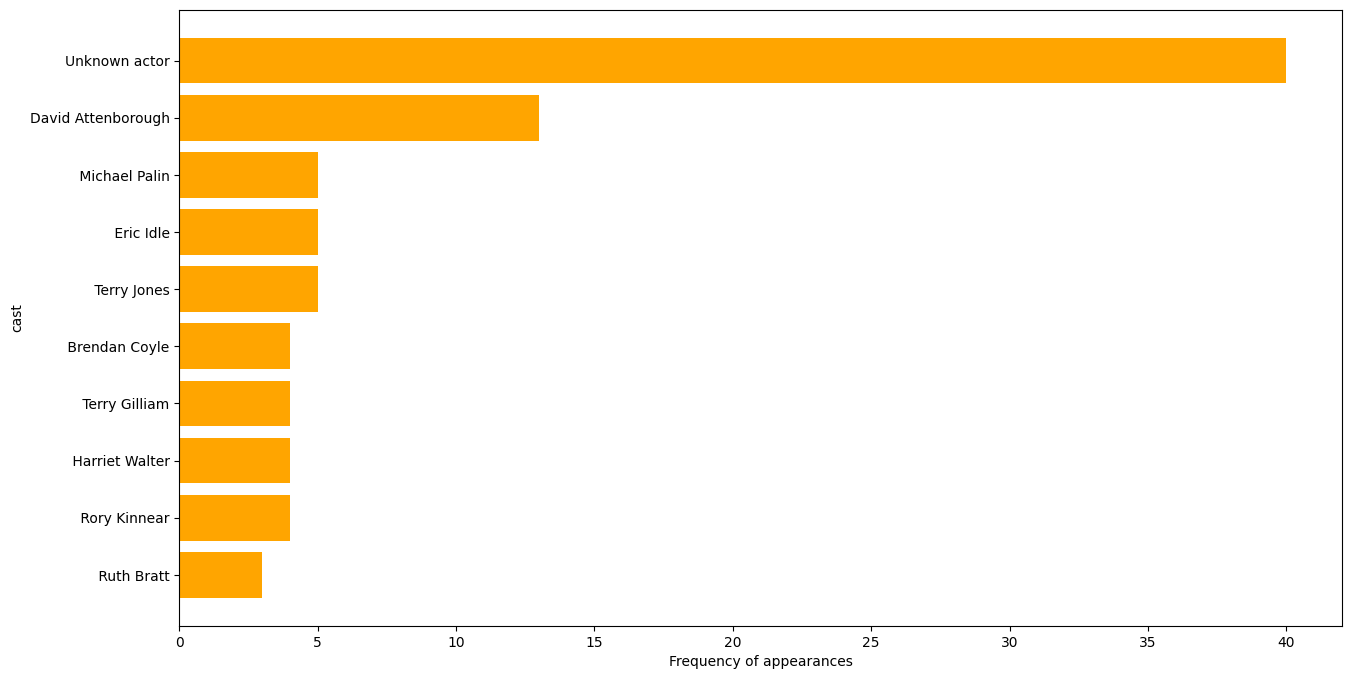

In [ ]:
df_cast=df_uk_shows.groupby(['cast']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
plt.barh(df_cast[::-1]['cast'], df_cast[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of appearances')
plt.ylabel('cast')
plt.show()



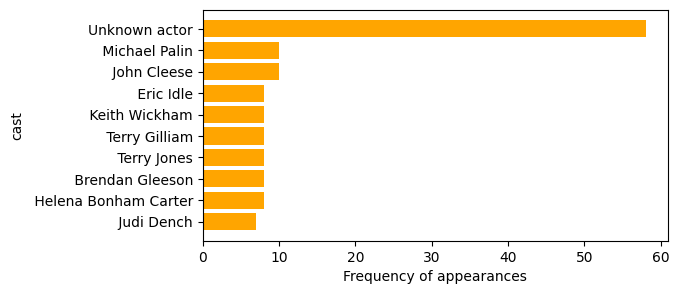

In [ ]:
df_cast=df_uk_movies.groupby(['cast']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(6,3))
plt.barh(df_cast[::-1]['cast'], df_cast[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of appearances')
plt.ylabel('cast')
plt.show()


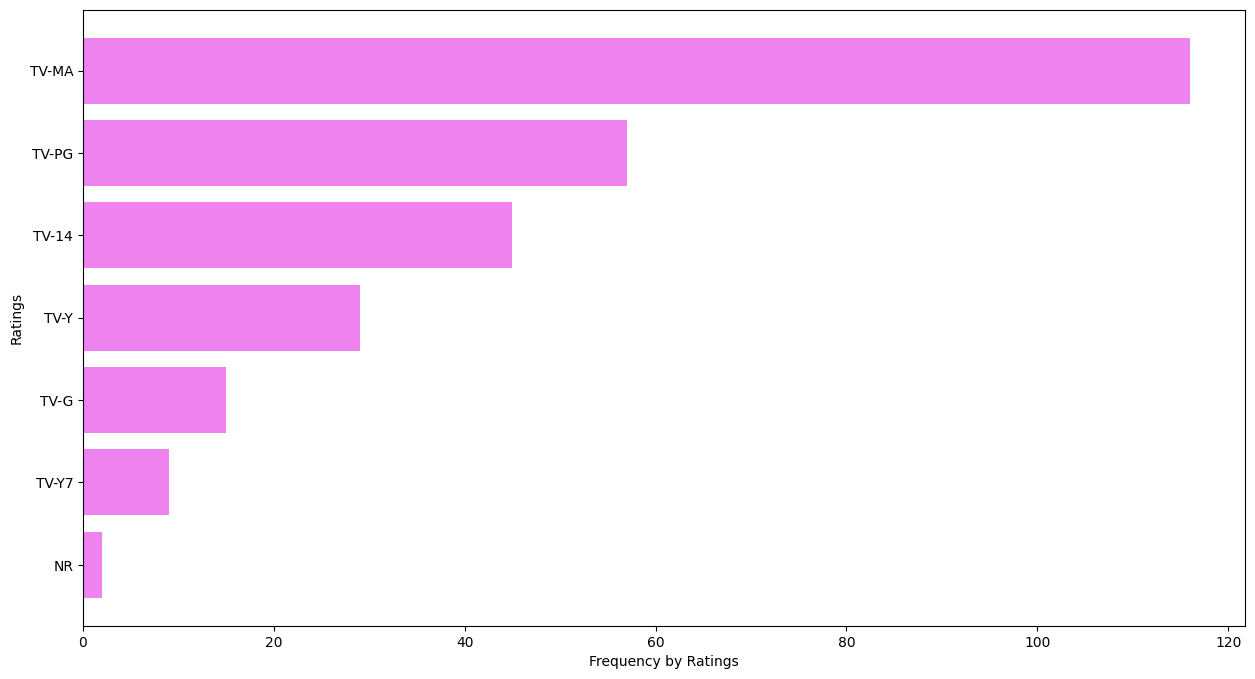

In [ ]:
df_rating=df_uk_shows.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'],color=['violet'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()


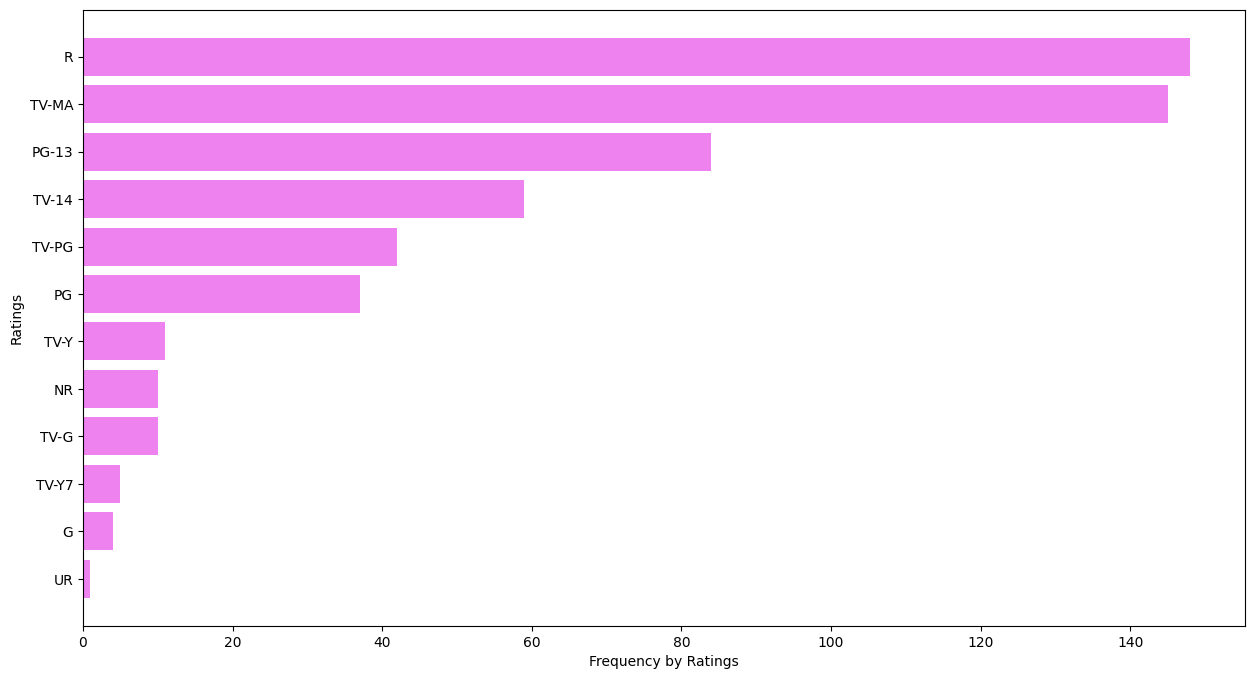

In [ ]:
df_rating=df_uk_movies.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'],color=['violet'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()


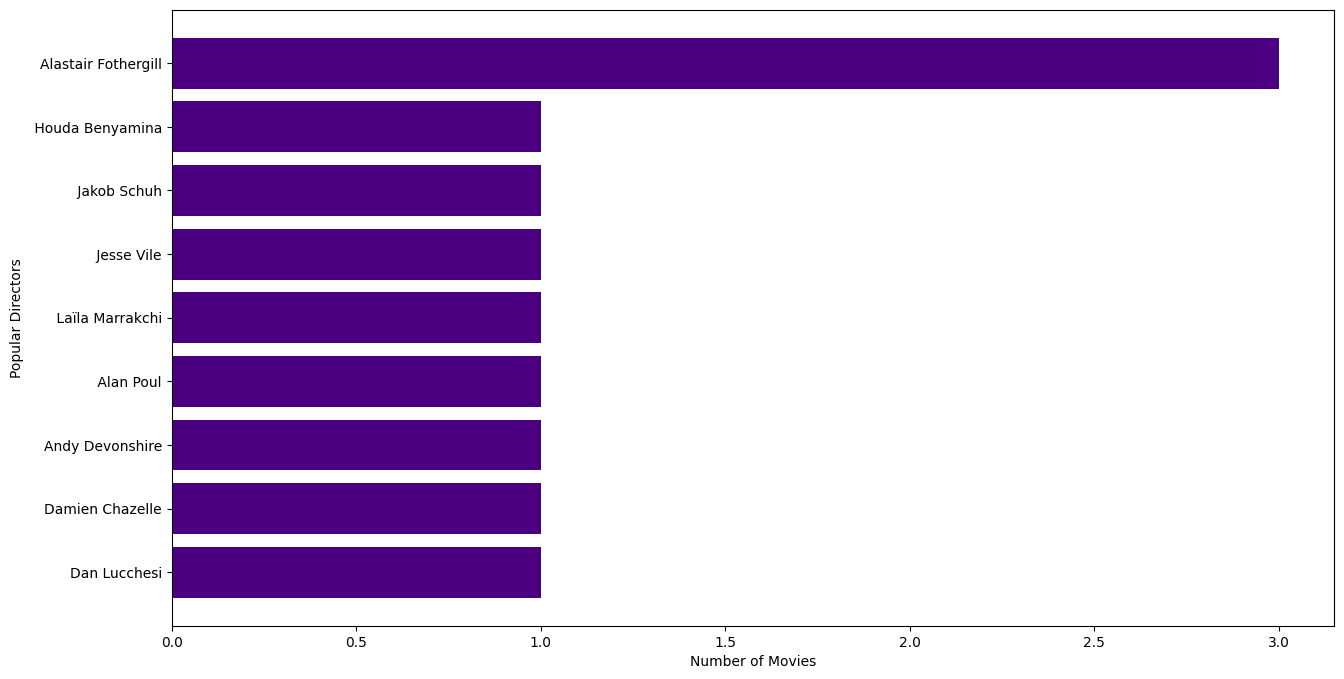

In [ ]:
df_directors=df_uk_shows.groupby(['director']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_directors=df_directors[df_directors['director']!='Unknown director']
plt.figure(figsize=(15,8))
plt.barh(df_directors[::-1]['director'], df_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors')
plt.show()


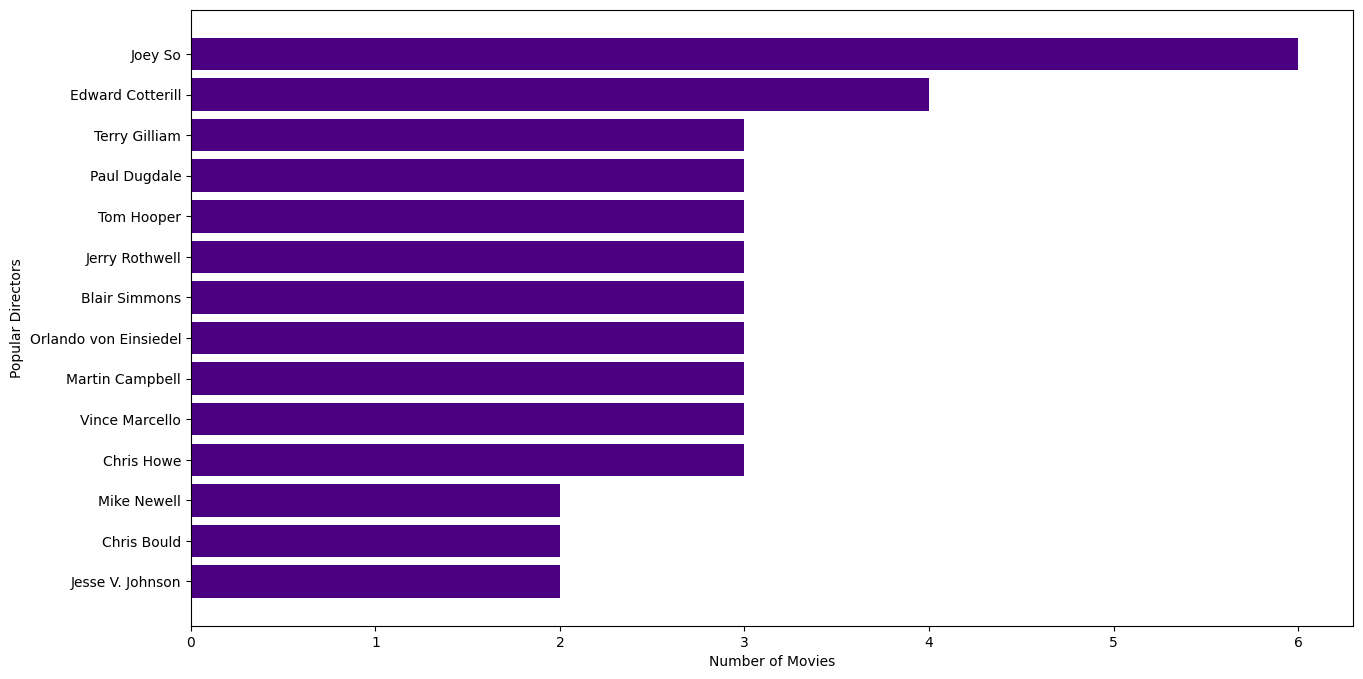

In [ ]:
df_directors=df_uk_movies.groupby(['director']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
df_directors=df_directors[df_directors['director']!='Unknown director']
plt.figure(figsize=(15,8))
plt.barh(df_directors[::-1]['director'], df_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors')
plt.show()


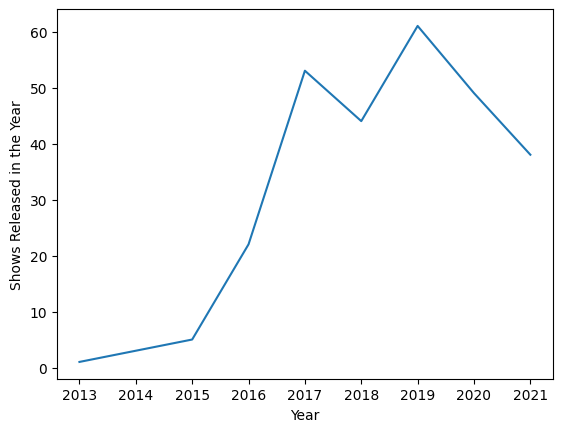

In [ ]:
df_year=df_uk_shows.groupby(['year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='year', y='title')
plt.ylabel("Shows Released in the Year")
plt.xlabel("Year")
plt.show()


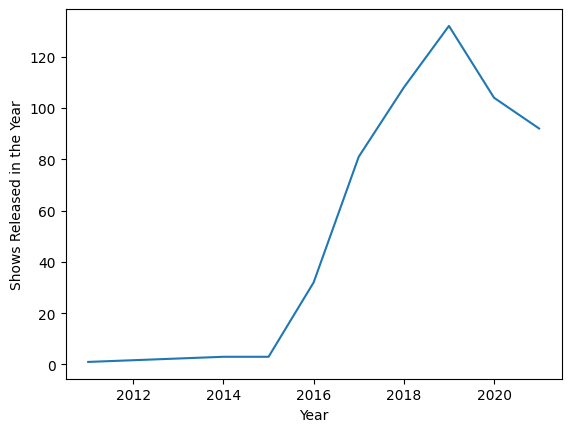

In [ ]:
df_year=df_uk_movies.groupby(['year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='year', y='title')
plt.ylabel("Shows Released in the Year")
plt.xlabel("Year")
plt.show()


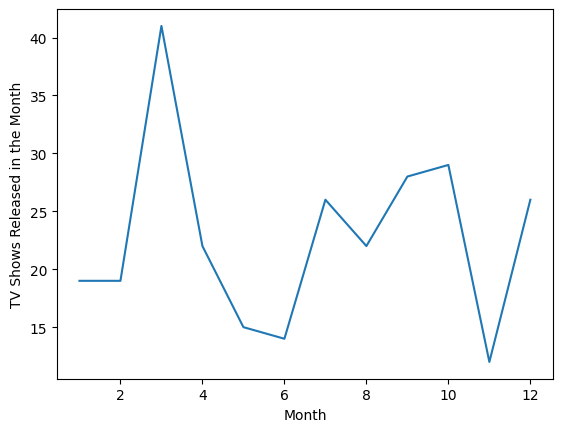

In [ ]:
df_month=df_uk_shows.groupby(['month_added']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_month, x='month_added', y='title')
plt.ylabel("TV Shows Released in the Month")
plt.xlabel("Month")
plt.show()


Most shows are added in March unlike USA

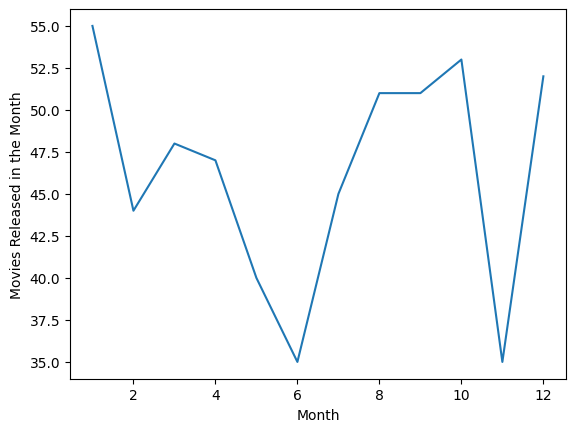

In [ ]:
df_month=df_uk_movies.groupby(['month_added']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_month, x='month_added', y='title')
plt.ylabel("Movies Released in the Month")
plt.xlabel("Month")
plt.show()


Most movies for UK being added in the months of January, Decemeber and also months of September and October

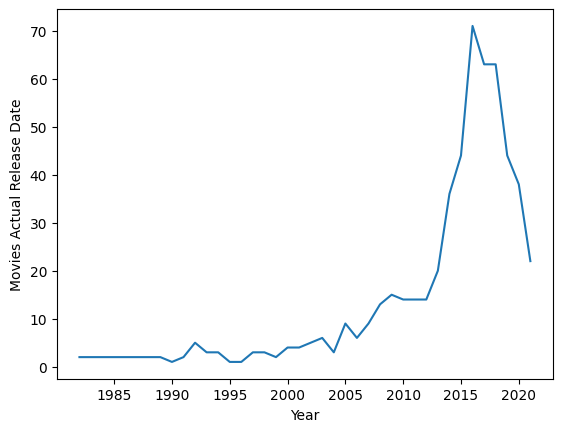

In [ ]:
df_release_year=df_uk_movies[df_uk_movies['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_release_year, x='release_year', y='title')
plt.ylabel("Movies Actual Release Date")
plt.xlabel("Year")
plt.show()


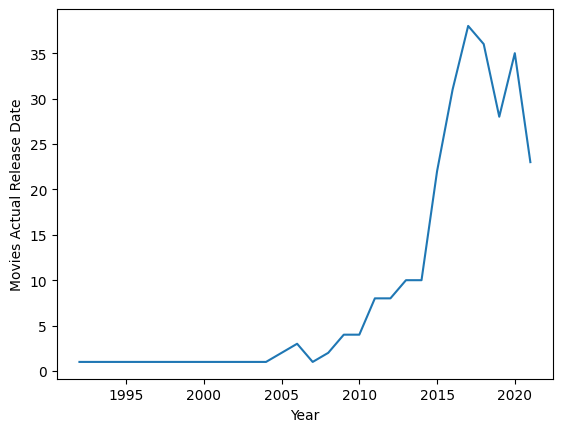

In [ ]:
df_release_year=df_uk_shows[df_uk_shows['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_release_year, x='release_year', y='title')
plt.ylabel("Movies Actual Release Date")
plt.xlabel("Year")
plt.show()


The trend of declining content in both shows and movies seemed to have caught up in UK even before 2019 unlike USA and India markets!

In [ ]:
df_uk_movies['Actor_Director_Combination'] = df_uk_movies.cast.str.cat(df_uk_movies.director, sep=' and ')
df_uk_movies_subset=df_uk_movies[df_uk_movies['cast']!='Unknown actor']
df_uk_movies_subset=df_uk_movies_subset[df_uk_movies_subset['director']!='Unknown director']
df_uk_movies_subset.head()


,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,description,Modified_Added_date,month_added,week_Added,year,Actor_Director_Combination
188,Sankofa,Haile Gerima,Kofi Ghanaba,United Kingdom,Dramas,s8,Movie,"September 24, 2021",1993,TV-MA,125,"On a photo shoot in Ghana, an American model s...",2021-09-24,9,38,2021,Kofi Ghanaba and Haile Gerima
189,Sankofa,Haile Gerima,Kofi Ghanaba,United Kingdom,Independent Movies,s8,Movie,"September 24, 2021",1993,TV-MA,125,"On a photo shoot in Ghana, an American model s...",2021-09-24,9,38,2021,Kofi Ghanaba and Haile Gerima
190,Sankofa,Haile Gerima,Kofi Ghanaba,United Kingdom,International Movies,s8,Movie,"September 24, 2021",1993,TV-MA,125,"On a photo shoot in Ghana, an American model s...",2021-09-24,9,38,2021,Kofi Ghanaba and Haile Gerima
206,Sankofa,Haile Gerima,Oyafunmike Ogunlano,United Kingdom,Dramas,s8,Movie,"September 24, 2021",1993,TV-MA,125,"On a photo shoot in Ghana, an American model s...",2021-09-24,9,38,2021,Oyafunmike Ogunlano and Haile Gerima
207,Sankofa,Haile Gerima,Oyafunmike Ogunlano,United Kingdom,Independent Movies,s8,Movie,"September 24, 2021",1993,TV-MA,125,"On a photo shoot in Ghana, an American model s...",2021-09-24,9,38,2021,Oyafunmike Ogunlano and Haile Gerima


In [ ]:
df_uk_movies_subset.groupby(['Actor_Director_Combination']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:20]

,Actor_Director_Combination,title
1778,Keith Wickham and Joey So,5
2730,Rob Rackstraw and Joey So,4
1515,Jo Wyatt and Blair Simmons,3
3691,Joey King and Vince Marcello,3
1301,Jacob Elordi and Vince Marcello,3
1777,Keith Wickham and Blair Simmons,3
2513,Paul Panting and Blair Simmons,3
2273,Molly Ringwald and Vince Marcello,3
2194,Michael Murphy and Blair Simmons,3
3830,Rachael Stirling and Edward Cotterill,3


In [ ]:
df_uk_shows['Actor_Director_Combination'] = df_uk_shows.cast.str.cat(df_uk_shows.director, sep=' and ')
df_uk_shows_subset=df_uk_shows[df_uk_shows['cast']!='Unknown cast']
df_uk_shows_subset=df_uk_shows_subset[df_uk_shows_subset['director']!='Unknown director']
df_uk_shows_subset.head()


,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,description,Modified_Added_date,month_added,week_Added,year,Actor_Director_Combination
323,The Great British Baking Show,Andy Devonshire,Mel Giedroyc,United Kingdom,British TV Shows,s9,TV Show,"September 24, 2021",2021,TV-14,9 Seasons,A talented batch of amateur bakers face off in...,2021-09-24,9,38,2021,Mel Giedroyc and Andy Devonshire
324,The Great British Baking Show,Andy Devonshire,Mel Giedroyc,United Kingdom,Reality TV,s9,TV Show,"September 24, 2021",2021,TV-14,9 Seasons,A talented batch of amateur bakers face off in...,2021-09-24,9,38,2021,Mel Giedroyc and Andy Devonshire
325,The Great British Baking Show,Andy Devonshire,Sue Perkins,United Kingdom,British TV Shows,s9,TV Show,"September 24, 2021",2021,TV-14,9 Seasons,A talented batch of amateur bakers face off in...,2021-09-24,9,38,2021,Sue Perkins and Andy Devonshire
326,The Great British Baking Show,Andy Devonshire,Sue Perkins,United Kingdom,Reality TV,s9,TV Show,"September 24, 2021",2021,TV-14,9 Seasons,A talented batch of amateur bakers face off in...,2021-09-24,9,38,2021,Sue Perkins and Andy Devonshire
327,The Great British Baking Show,Andy Devonshire,Mary Berry,United Kingdom,British TV Shows,s9,TV Show,"September 24, 2021",2021,TV-14,9 Seasons,A talented batch of amateur bakers face off in...,2021-09-24,9,38,2021,Mary Berry and Andy Devonshire


In [ ]:
df_uk_shows_subset.groupby(['Actor_Director_Combination']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:5]


,Actor_Director_Combination,title
213,David Attenborough and Alastair Fothergill,3
1,Adil Dehbi and Houda Benyamina,1
2,Adil Dehbi and Laïla Marrakchi,1
3,Adil Dehbi and Damien Chazelle,1
0,Adil Dehbi and Alan Poul,1


 ## <font color='black'>**Japan**</font>

In [ ]:
df_japan_shows=df_final[df_final['country']=='Japan'][df_final[df_final['country']=='Japan']['type']=='TV Show']

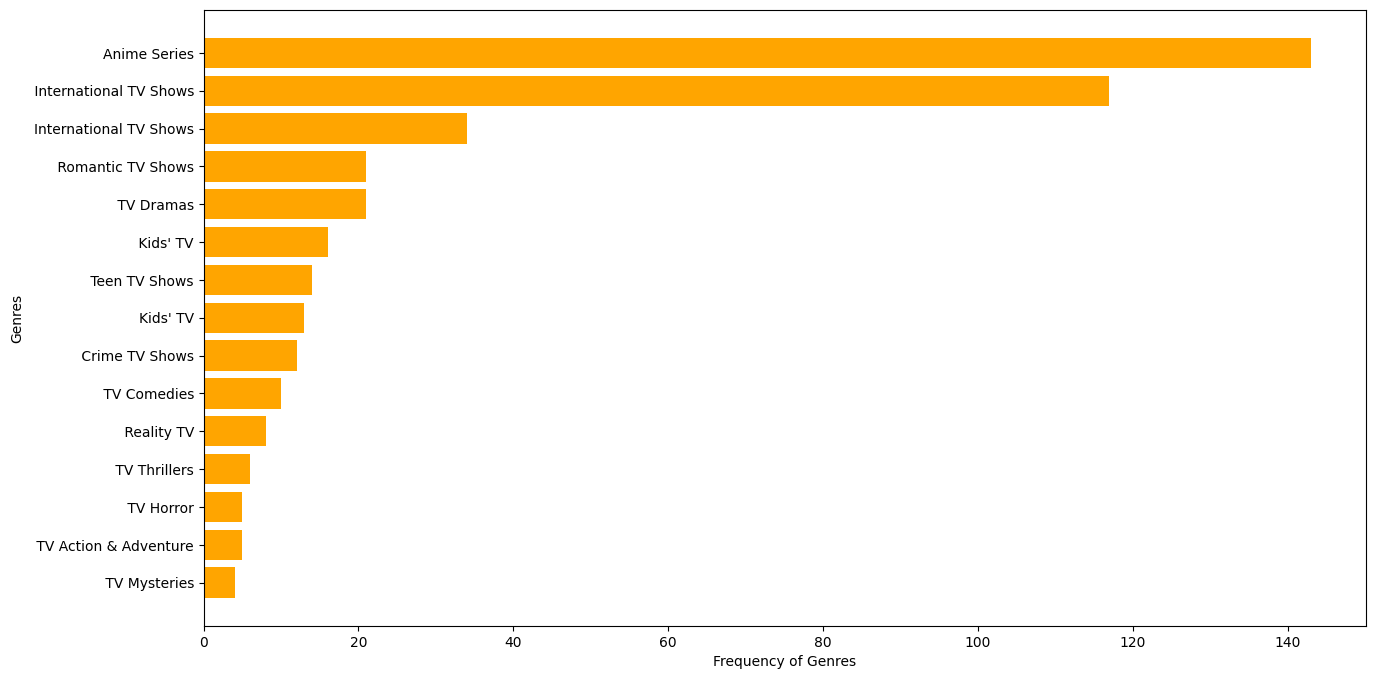

In [ ]:
df_genre=df_japan_shows.groupby(['listed_in']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['listed_in'], df_genre[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

Animes shows are more popular and mysteries, Action & adventure are less popular in Japanese markets

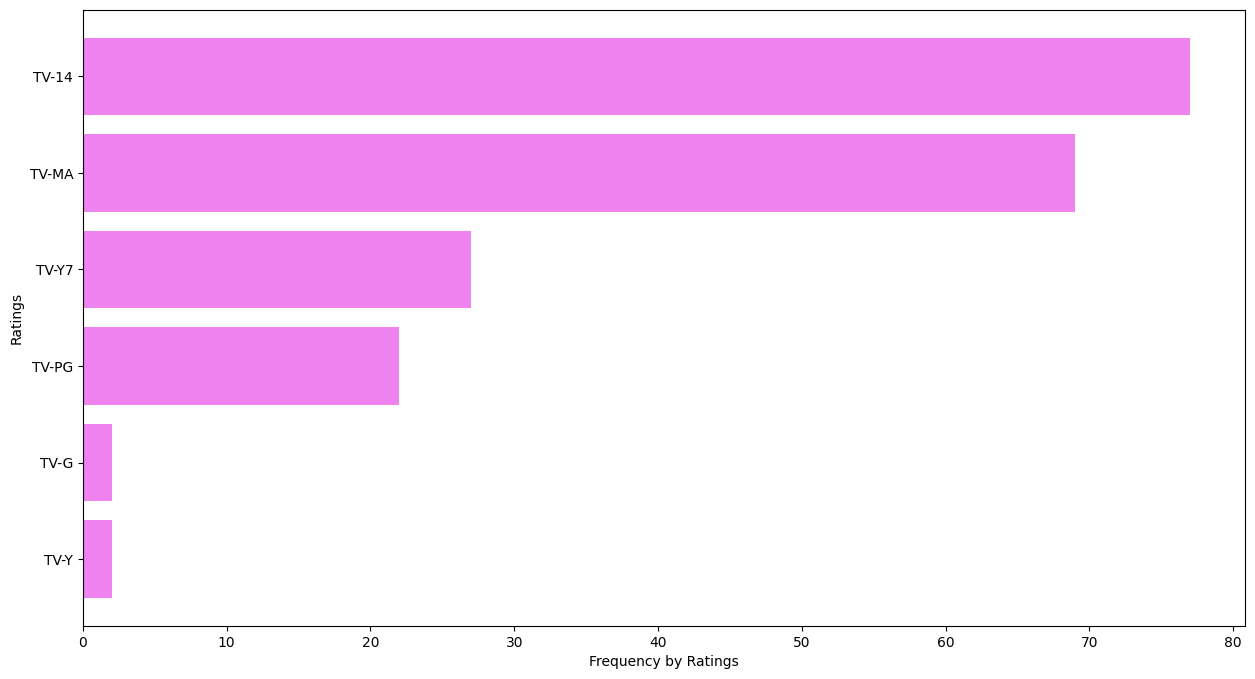

In [ ]:
df_rating=df_japan_shows.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'],color=['violet'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()

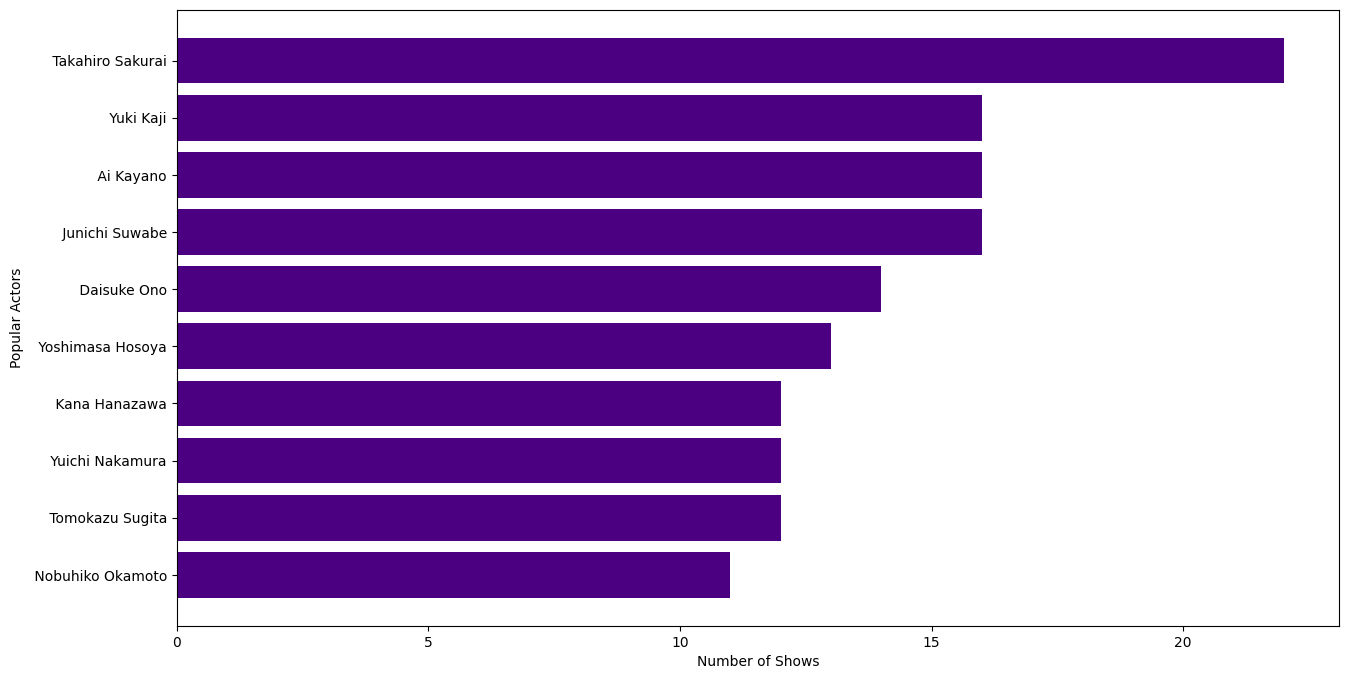

In [ ]:
df_actors=df_japan_shows.groupby(['cast']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_actors=df_actors[df_actors['cast']!='Unknown actor']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['cast'], df_actors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Shows')
plt.ylabel('Popular Actors')
plt.show()

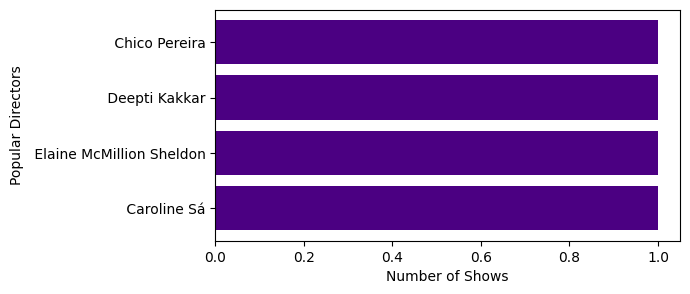

In [ ]:
df_directors=df_japan_shows.groupby(['director']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:5]
df_directors=df_directors[df_directors['director']!='Unknown director']
plt.figure(figsize=(6,3))
plt.barh(df_directors[::-1]['director'], df_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Shows')
plt.ylabel('Popular Directors')
plt.show()

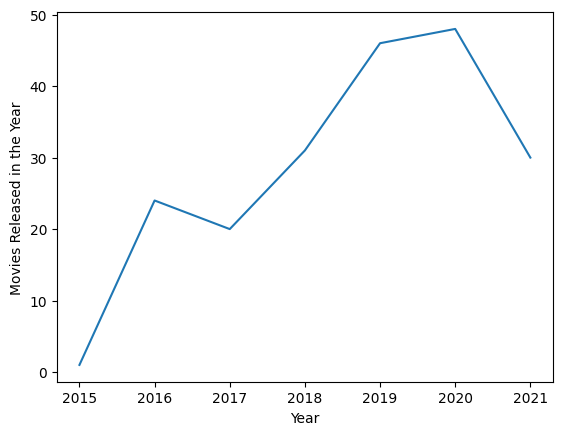

In [ ]:
df_year=df_japan_shows.groupby(['year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='year', y='title')
plt.ylabel("Movies Released in the Year")
plt.xlabel("Year")
plt.show()

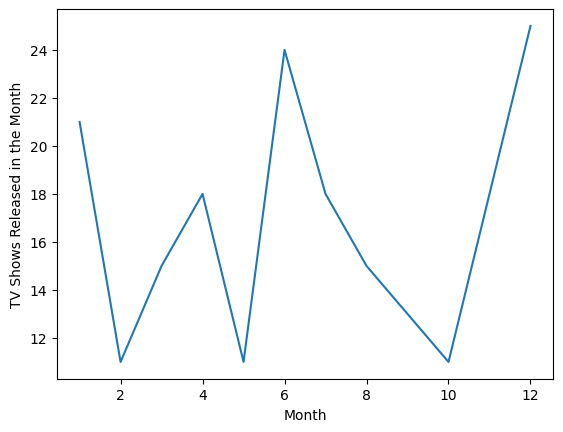

In [ ]:
df_month=df_japan_shows.groupby(['month_added']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_month, x='month_added', y='title')
plt.ylabel("TV Shows Released in the Month")
plt.xlabel("Month")
plt.show()

 ## <font color='black'>**South Korea**</font>

In [ ]:
df_sk_shows=df_final[df_final['country']=='South Korea'][df_final[df_final['country']=='South Korea']['type']=='TV Show']

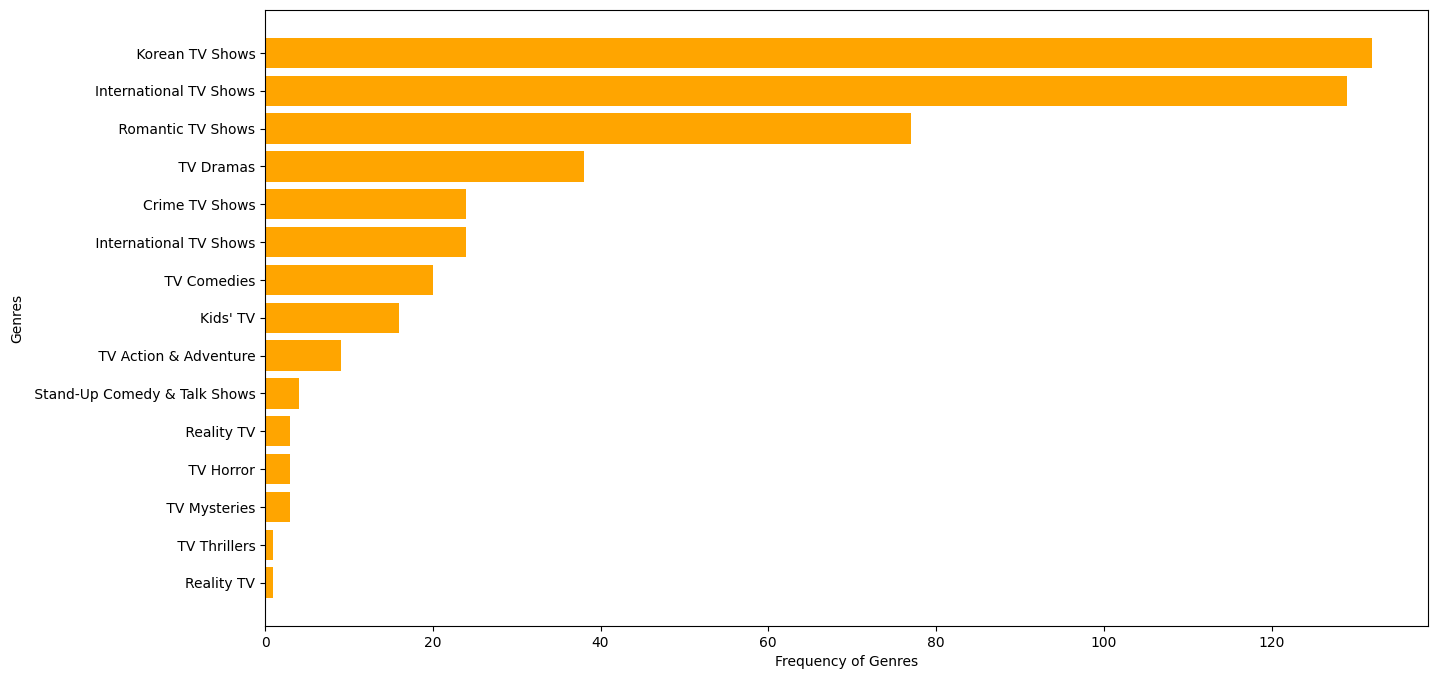

In [ ]:
df_genre=df_sk_shows.groupby(['listed_in']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['listed_in'], df_genre[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

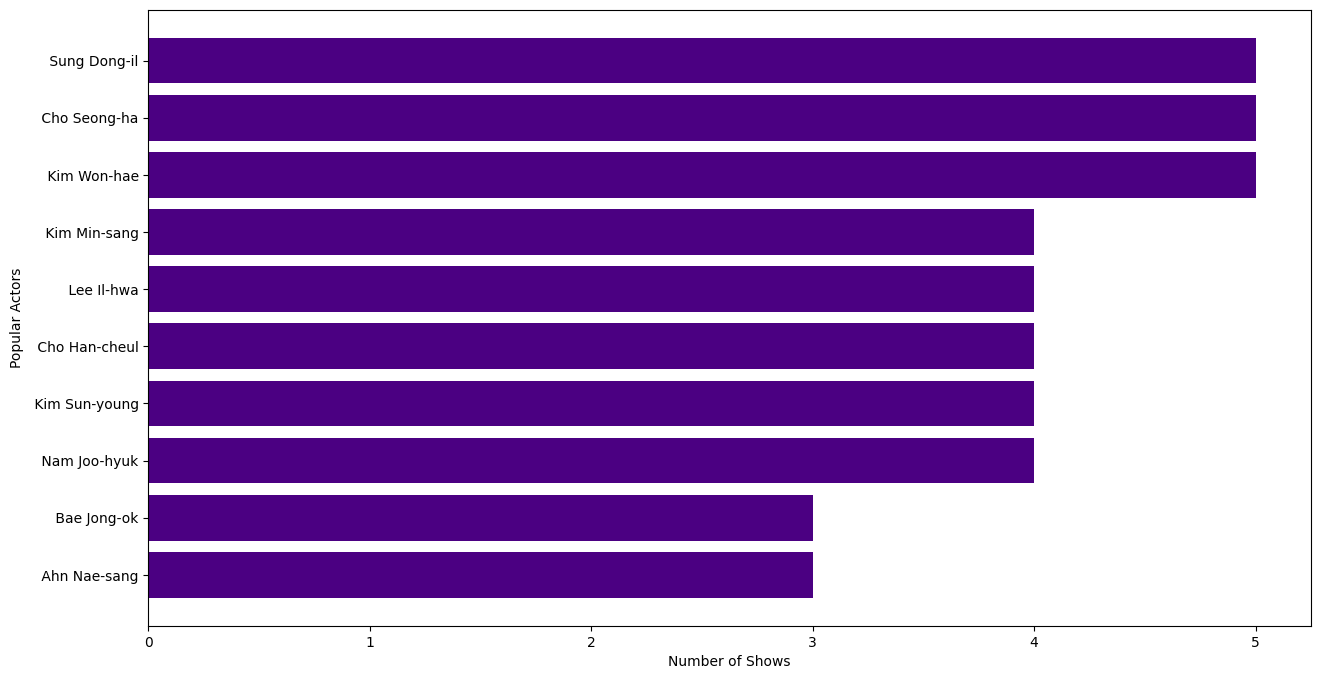

In [ ]:
df_actors=df_sk_shows.groupby(['cast']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_actors=df_actors[df_actors['cast']!='Unknown actor']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['cast'], df_actors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Shows')
plt.ylabel('Popular Actors')
plt.show()

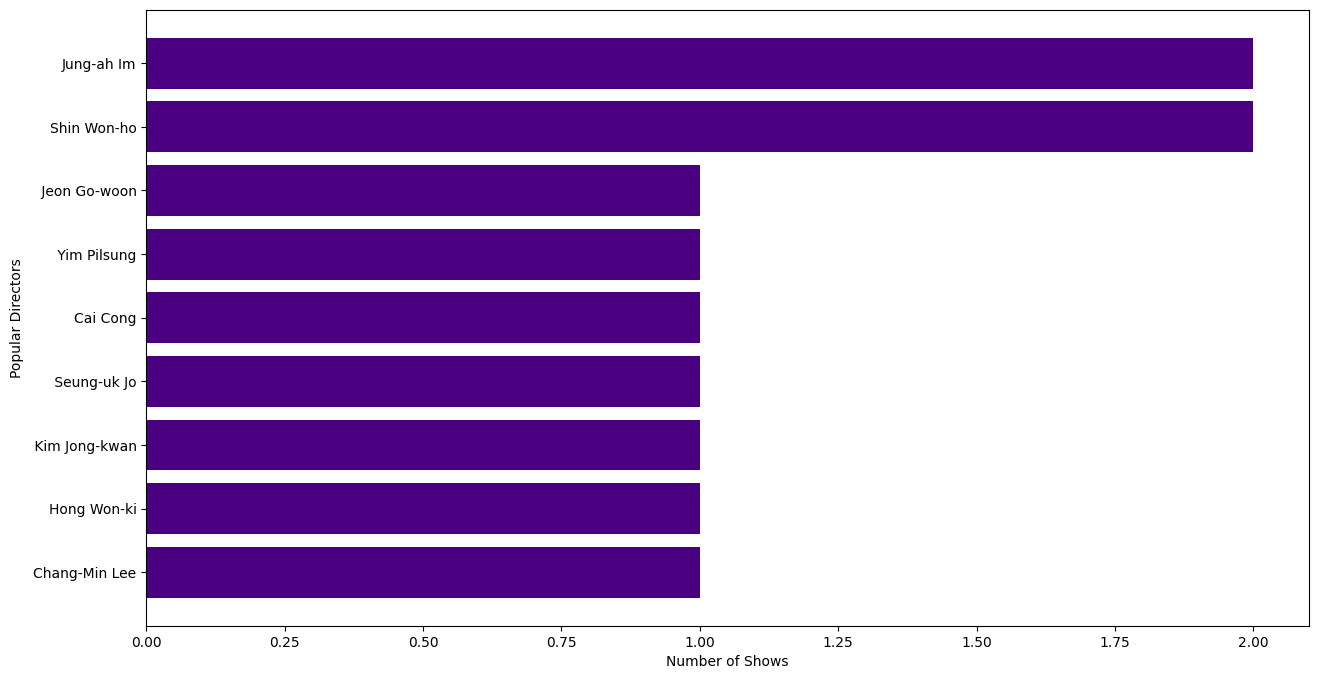

In [ ]:
df_directors=df_sk_shows.groupby(['director']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_directors=df_directors[df_directors['director']!='Unknown director']
plt.figure(figsize=(15,8))
plt.barh(df_directors[::-1]['director'], df_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Shows')
plt.ylabel('Popular Directors')
plt.show()

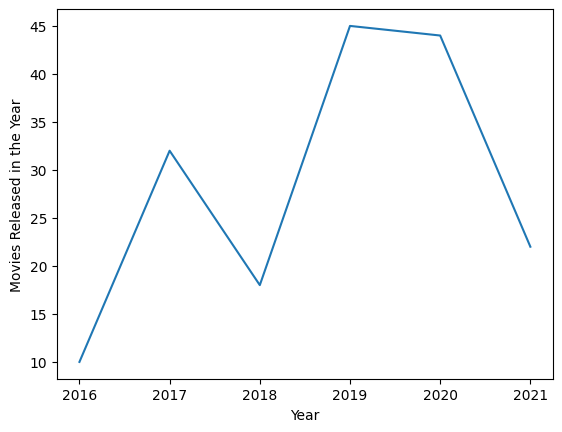

In [ ]:
df_year=df_sk_shows.groupby(['year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='year', y='title')
plt.ylabel("Movies Released in the Year")
plt.xlabel("Year")
plt.show()

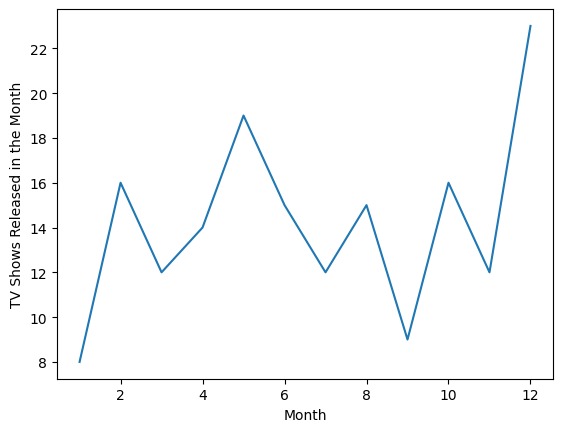

In [ ]:
df_month=df_sk_shows.groupby(['month_added']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_month, x='month_added', y='title')
plt.ylabel("TV Shows Released in the Month")
plt.xlabel("Month")
plt.show()

May and December are popular months for release of shows

### <font color='blue'>**Recommendations**</font>


1. No. of additions on to the platform is commensurate with the movie/show releases per year. Content generation across major markets is going down significantly since 2019. Declining trend started much earlier for UK in comparision to other markets. So it is suggested to create more new content. Generating own content as well as tie ups with movie industries is beneficial

2. High Movie/show releases month on platform varies market-to-market.For instance for movies, releases in India are more during April month while in USA it is more in July and December months. Planing and aligning with the country specific timeline helps in business growth

3. The most featured Genres across the countries(for both TV Shows and Movies) are International TV Shows& Movies, Drama, Comedy and mainly it is being contributed by India and UK markets. So content aligning to that is recommended.

4. Biggest market for TV shows & Movies - USA has different consumption pattern with Kids Tv and Family shows, Dramas and Comedies being popular as compared to next two major markets. Tailoring content with this in mind for USA is recommended

5. The target audience in USA and India is recommended to be 14+ and above ratings while for UK, its recommended to be completely Mature/R content

6. Anime Genre for Japan and Romantic Genre in TV Shows for
 South Korean audiences is recommended.